In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\panda\Desktop\my machine learning docs\mushroom dataset model\Data (1).csv")
df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

#### As seen from above, our dataset has 61069 rows and 23 columns. Each column has a different feature of the mushrooms which are the column names of the dataset.

In [3]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
# Check how many rows in the DataFrame are duplicates
df.duplicated().sum()

146

In [5]:
# Drop duplicate rows in the dataframe
df.drop_duplicates(inplace = True)

In [6]:
import plotly.graph_objects as go

# Assuming 'class' is the column containing the mushroom classes (Edible and Poisonous)
labels = ['Edible', 'Poisonous']
values = [df['class'].value_counts()['e'], df['class'].value_counts()['p']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

**As seen from the figure above, the red part represents that the percentage of the poisonous mushrooms in the dataset. The green part represents that the percentage of edible mushrooms. The percentages of these classes are pretty close to each other.About 44% are edible and 56% are poisonous, There is no imbalance in the dataset**

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\4170793883.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




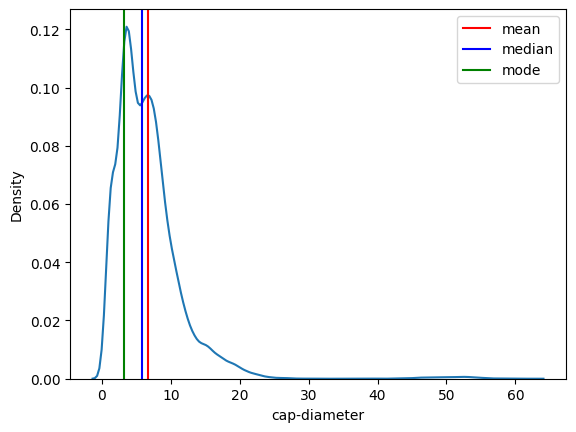

In [7]:
a = df['cap-diameter']  # Get the 'cap-diameter' column from the 'df' DataFrame
mean = a.mean()  # Calculate the mean of the 'cap-diameter' column
median = np.median(a)  # Calculate the median of the 'cap-diameter' column
mode = a.mode()  # Calculate the mode of the 'cap-diameter' column

sns.distplot(a, hist=False)  # Plot a distribution plot for the 'cap-diameter' column
plt.axvline(mean, color='r', label='mean')  # Add a red vertical line representing the mean value
plt.axvline(median, color='b', label='median')  # Add a blue vertical line representing the median value
plt.axvline(mode[0], color='g', label='mode')  # Add a green vertical line representing the mode value

plt.legend()  # Show the legend
plt.show()  # Show the plot


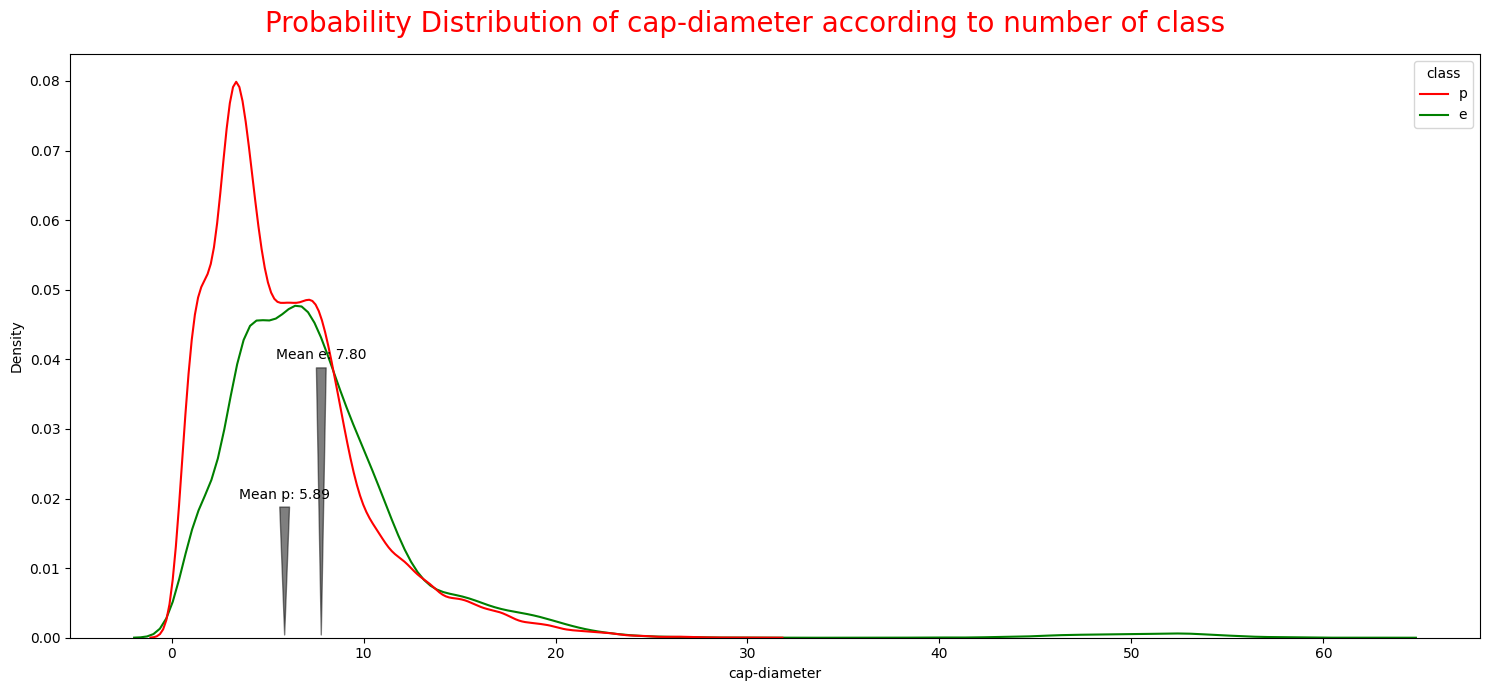

In [8]:
plt.figure(figsize=(15,7))
plt.suptitle("Probability Distribution of cap-diameter according to number of class", fontsize=20, color="Red")

sns.kdeplot(data=df, x='cap-diameter',hue = 'class',palette=['red', 'green'])
# Calculate and annotate the mean for each class
for cls in df['class'].unique():
    mean_value = df[df['class'] == cls]['cap-diameter'].mean()
    plt.annotate(f'Mean {cls}: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value, 0.02 * (df['class'].unique().tolist().index(cls) + 1)),
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 fontsize=10, ha='center')

plt.tight_layout()
plt.show()

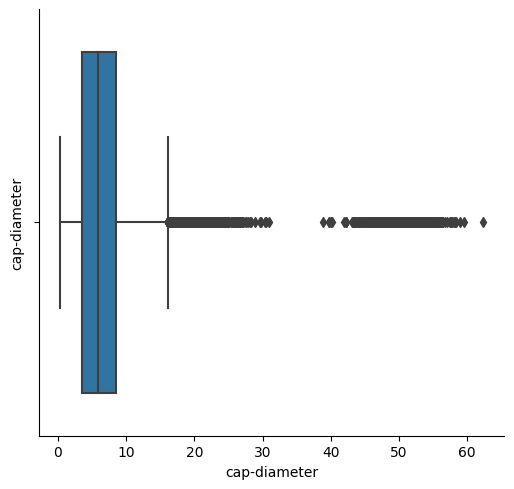

In [9]:
# Plot a box plot of cap-diameter
sns.catplot( x = 'cap-diameter',kind = "box",data=df)
plt.ylabel("cap-diameter")
plt.show()

**As seen fron the above figure, 
1) Cap diameter is slighty right skewed,
2) Edible mushroom distribution seems to be more spread out than the poisonous mushroom distribution.
3) Mean cap-diameter of poisonous mushroom is around 5.88 and for edible is around 7.80, . This suggests that, on average, edible mushrooms have larger cap diameters than poisonous mushrooms.
4) There is a significant overlap between the two distributions. This means that there are some edible mushrooms with small cap diameters and some poisonous mushrooms with large cap diameters. This highlights the importance of using multiple features for mushroom identification, not just cap diameter.**
5) Plenty of outliers are there

In [10]:
# Apply log transformation to 'cap-diameter' column in df
df['log-transformed-cap-diameter'] = np.log1p(df['cap-diameter'])
df['log-transformed-cap-diameter']

0        2.788708
1        2.867899
2        2.712706
3        2.719320
4        2.749832
           ...   
61064    0.779325
61065    0.819780
61066    0.819780
61067    0.806476
61068    0.774727
Name: log-transformed-cap-diameter, Length: 60923, dtype: float64

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3007859593.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




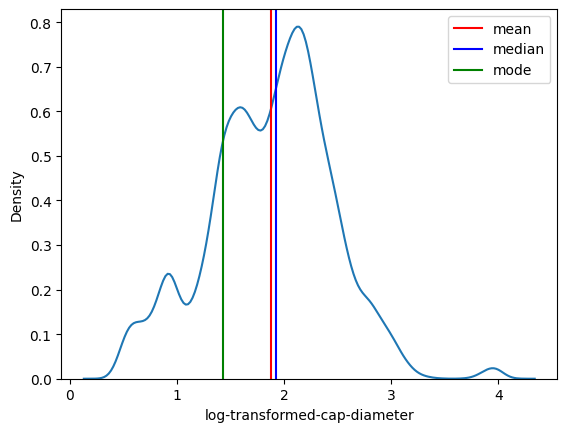

In [11]:
a=df['log-transformed-cap-diameter']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [12]:
from scipy.stats import boxcox
# Adding a constant to make the variable positive
positive_X = df['cap-diameter'] + abs(df['cap-diameter'].min()) + 1  # Add 1 to handle zero values

# Applying Box-Cox transformation for the column cap-diameter
transformed_X, lambda_value = boxcox(positive_X)

# Add the transformed values to your DataFrame
df['boxcox-transformed-cap-diameter'] = transformed_X
df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-color veil-type veil-color has-ring ring-type  \
0            16.95  ...           w         u          w        t         g   
1            17.99  ...           w         u          w        t         g   
2            17.80  ...           w         u          w        t         g   
3            15.77  ...           w         u          w        t         p   
4            16.53  ...           w         u          w        t         p   
...            ...  ...         ...       ...        ...      ...       ...   
61064         3.93  ...           y       NaN        NaN        f         f   
61065         3.18  ...           y       NaN        NaN        f         f   
61066         3.86  ...           y       NaN        NaN        f         f   
61067         3.56  ...           y       NaN        NaN        f         f   
61068         3.25  ...           y       NaN        NaN        f         f   

      spore-print-color habitat season log-transformed-cap-diameter  \
0                   NaN       d      w                     2.788708   
1                   NaN       d      u                     2.867899   
2                   NaN       d      w                     2.712706   
3                   NaN       d      w                     2.719320   
4                   NaN       d      w                     2.749832   
...                 ...     ...    ...                          ...   
61064               NaN       d      a                     0.779325   
61065               NaN       d      a                     0.819780   
61066               NaN       d      u                     0.819780   
61067               NaN       d      u                     0.806476   
61068               NaN       d      u                     0.774727   

      boxcox-transformed-cap-diameter  
0                            2.672059  
1                            2.741842  
2                            2.605019  
3                            2.610855  
4                            2.637774  
...                               ...  
61064                        0.924032  
61065                        0.957396  
61066                        0.957396  
61067                        0.946407  
61068                        0.920250  

[60923 rows x 23 columns]

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3322138850.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




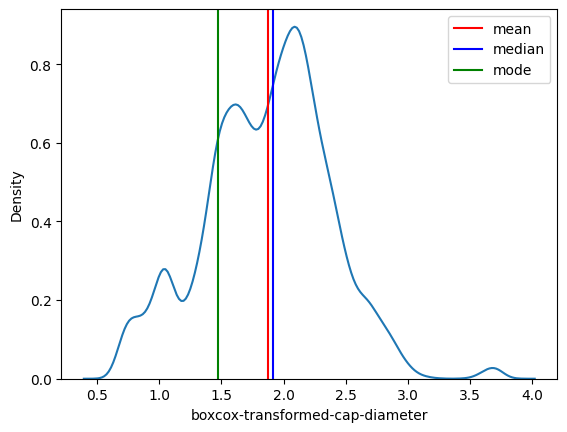

In [13]:
  """
    Display a distribution plot of the 'boxcox-transformed-cap-diameter' column in df,
    along with the mean, median, and mode lines.
    
    Parameters:
        - df (pd.DataFrame): DataFrame containing the 'boxcox-transformed-cap-diameter' column
    """
a=df['boxcox-transformed-cap-diameter']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [14]:
# Calculate skewness of the 'log-transformed-cap-diameter' column
from scipy.stats import skew
skewness = skew(df['log-transformed-cap-diameter'])
print(f"Skewness for 'log-transformed-cap-diameter': {skewness}")
# Calculate skewness of the 'boxcox-transformed-cap-diameter' column
from scipy.stats import skew
skewness = skew(df['boxcox-transformed-cap-diameter'])
print(f"Skewness for 'boxcox-transformed-cap-diameter': {skewness}")

Skewness for 'log-transformed-cap-diameter': -0.04206314199218217
Skewness for 'boxcox-transformed-cap-diameter': -0.001972635202886314


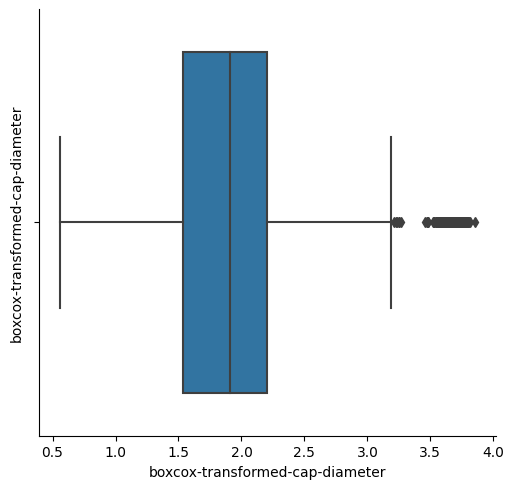

In [15]:
# Plot a box plot of the boxcox-transformed-cap-diameter
sns.catplot( x = 'boxcox-transformed-cap-diameter',kind = "box",data=df)
plt.ylabel("boxcox-transformed-cap-diameter")
plt.show()

In [16]:
# Creating function to remove outliers
def remove_outliers(dataframe, column_name):
    """
Remove outliers from a specified column in the given dataframe. """
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Remove outliers
    filtered_data = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    return filtered_data

# Apply the function to remove outliers from 'retail_shop_num'
df = remove_outliers(df, 'boxcox-transformed-cap-diameter')

# Display the filtered DataFrame
df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-color veil-type veil-color has-ring ring-type  \
0            16.95  ...           w         u          w        t         g   
1            17.99  ...           w         u          w        t         g   
2            17.80  ...           w         u          w        t         g   
3            15.77  ...           w         u          w        t         p   
4            16.53  ...           w         u          w        t         p   
...            ...  ...         ...       ...        ...      ...       ...   
61064         3.93  ...           y       NaN        NaN        f         f   
61065         3.18  ...           y       NaN        NaN        f         f   
61066         3.86  ...           y       NaN        NaN        f         f   
61067         3.56  ...           y       NaN        NaN        f         f   
61068         3.25  ...           y       NaN        NaN        f         f   

      spore-print-color habitat season log-transformed-cap-diameter  \
0                   NaN       d      w                     2.788708   
1                   NaN       d      u                     2.867899   
2                   NaN       d      w                     2.712706   
3                   NaN       d      w                     2.719320   
4                   NaN       d      w                     2.749832   
...                 ...     ...    ...                          ...   
61064               NaN       d      a                     0.779325   
61065               NaN       d      a                     0.819780   
61066               NaN       d      u                     0.819780   
61067               NaN       d      u                     0.806476   
61068               NaN       d      u                     0.774727   

      boxcox-transformed-cap-diameter  
0                            2.672059  
1                            2.741842  
2                            2.605019  
3                            2.610855  
4                            2.637774  
...                               ...  
61064                        0.924032  
61065                        0.957396  
61066                        0.957396  
61067                        0.946407  
61068                        0.920250  

[60579 rows x 23 columns]

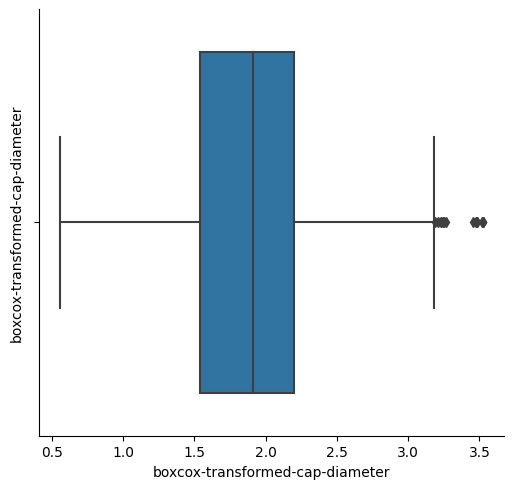

In [17]:
# Plot a box plot of the boxcox-transformed-cap-diamete
sns.catplot( x = 'boxcox-transformed-cap-diameter',kind = "box",data=df)
plt.ylabel("boxcox-transformed-cap-diameter")
plt.show()

# Cap Shapes
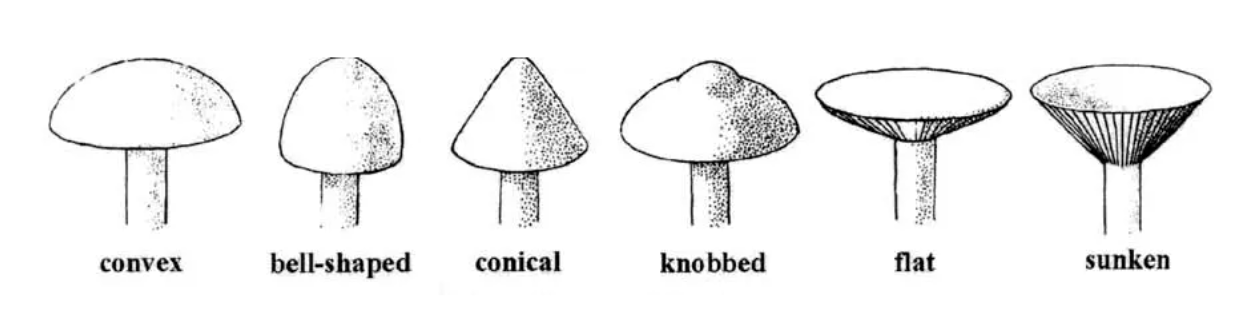

cap-shape (n):  bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o

x    26932
f    13404
s     7164
b     5694
o     2972
p     2598
c     1815
Name: cap-shape, dtype: int64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

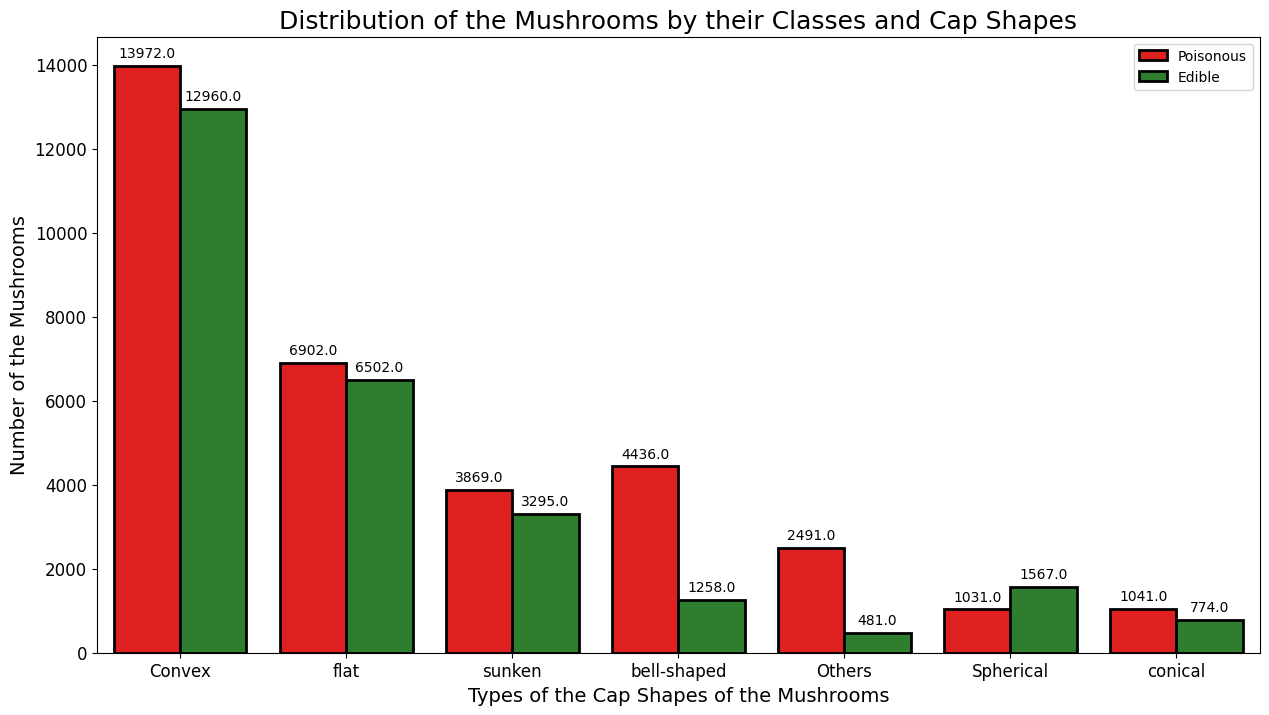

In [18]:
print(df['cap-shape'].value_counts())
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-shape',
                      hue='class',
                      order=df['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'flat', 'sunken', 'bell-shaped', 'Others','Spherical','conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=18)

From the above figure:
1) Convex cap shapes are most common for both edible and poisonous mushrooms, followed by sunken and bell shapes.
2) Spherical and conical shapes are less common overall.
3) No cap shape guarantees edibility


# Cap Surfaces
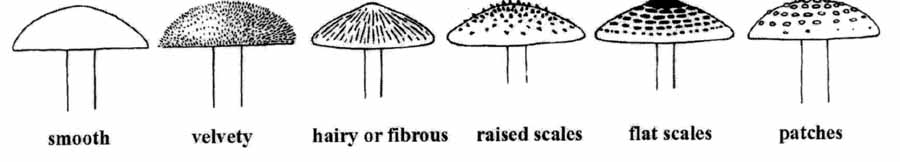

cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e

t    8184
s    7580
y    5997
h    4974
g    4722
d    4432
e    2584
k    2303
i    2225
w    2150
l    1308
Name: cap-surface, dtype: int64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surfaces')

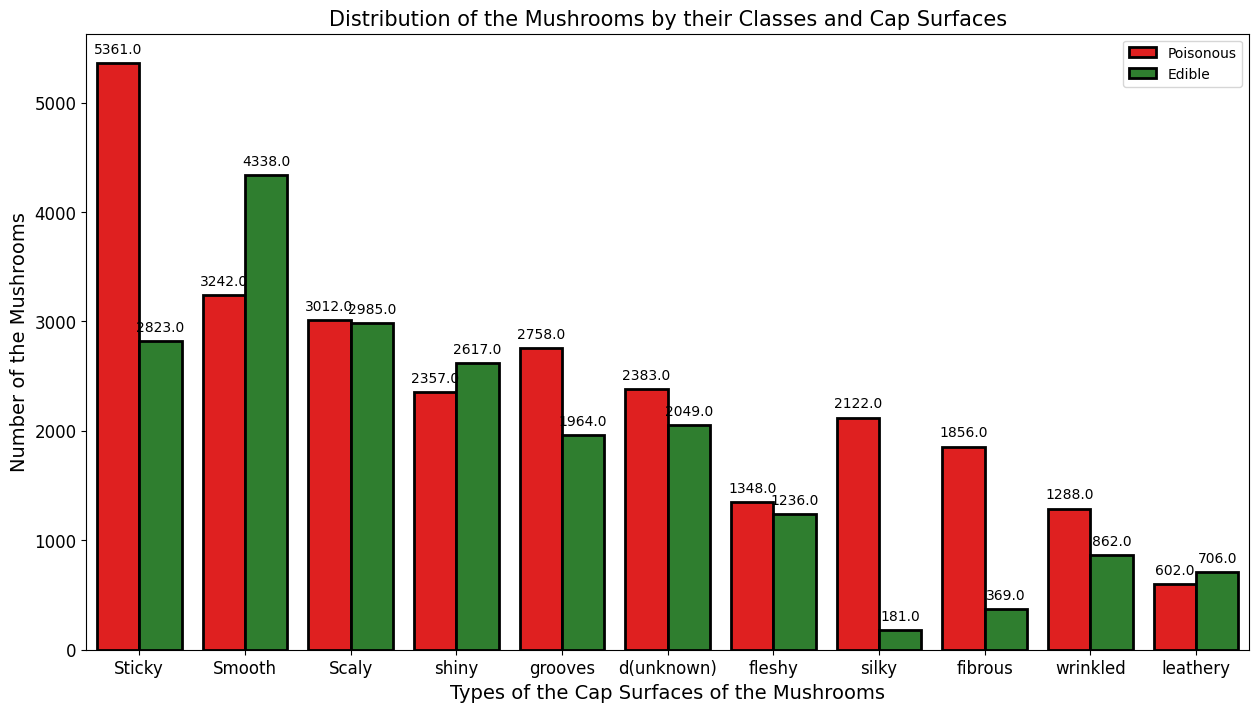

In [19]:
print(df['cap-surface'].value_counts())
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-surface',
                      hue='class',
                      order=df['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Sticky', 'Smooth', 'Scaly', 'shiny','grooves','d(unknown)','fleshy','silky','fibrous','wrinkled','leathery'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=15)

The above figure showes that:
1) Sticky caps are the most prevalent type, with over 8196 mushrooms in both edible and poisonous classes followed by smooth and scaly
2) 66% fo Sticky caps are mostly poisonous
3) If you find a silky cap surface there is 92% chance that the mushroom is poisonous
4) There is 83% chance that a mushroom having a fibrous cap surface is poisonous


## Cap Colors
cap-color (n):  brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k


n    24205
y     8197
w     7649
g     4312
e     4035
o     3653
r     1779
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

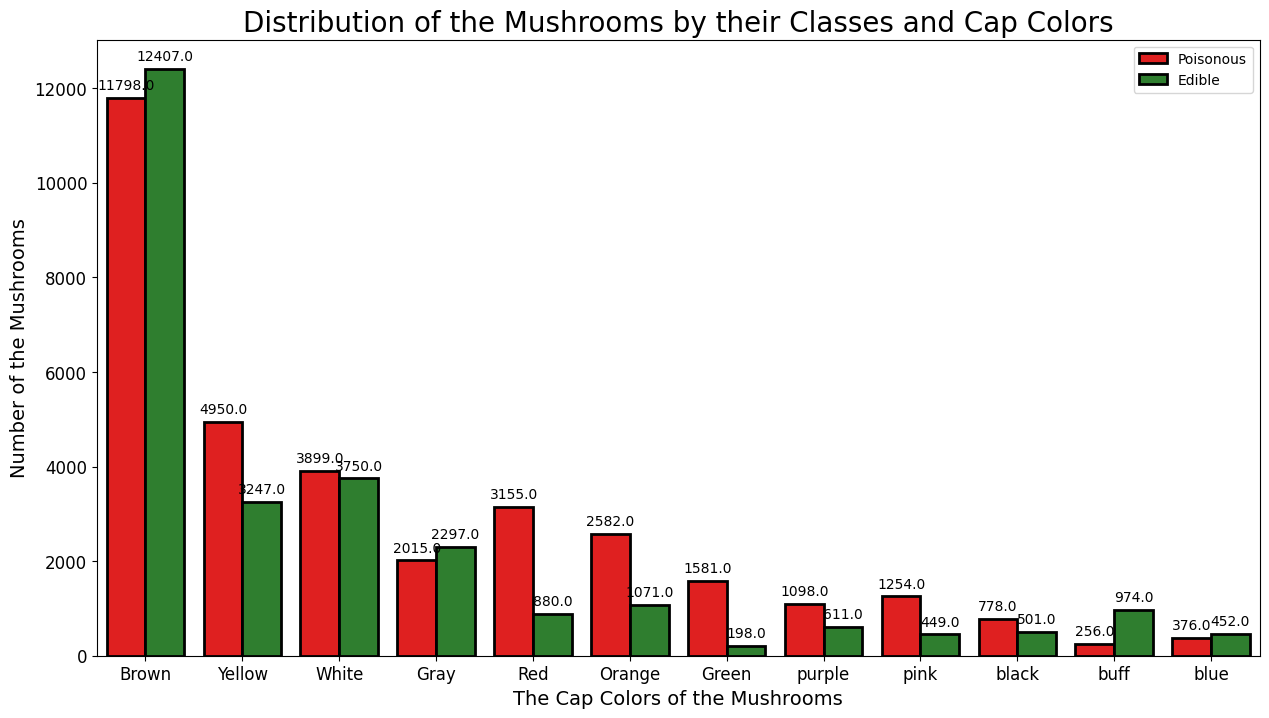

In [20]:
print(df['cap-color'].value_counts())
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-color',
                      hue='class',
                      order=df['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Yellow', 'White', 'Gray', 'Red', 'Orange', 'Green', 'purple', 'pink', 'black','buff','blue'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

From the above figure we can see:
1) Brown mushrooms are the most frequent in both classes, followed by yellow and white.
2) Red, orange, green, purple, pink, black, buff, and blue mushrooms are less common.
3) Mushrooms with brights colors like red, orange,green,pink shows more chance of being poisonous

## Bruises

f    49989
t    10590
Name: does-bruise-or-bleed, dtype: int64
f    0.825187
t    0.174813
Name: does-bruise-or-bleed, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by Classes and Bruises')

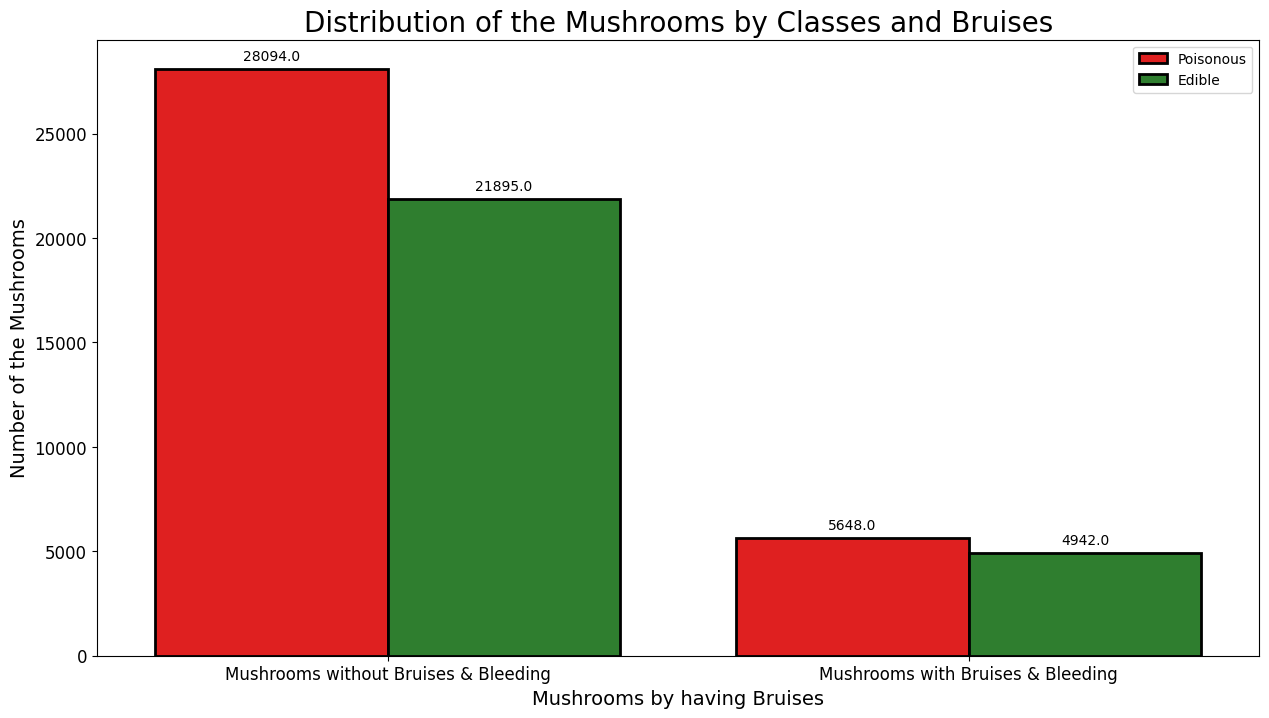

In [21]:
print(df['does-bruise-or-bleed'].value_counts())
print((df['does-bruise-or-bleed'].value_counts())/df.shape[0])
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='does-bruise-or-bleed',
                      hue='class',
                      order=df['does-bruise-or-bleed'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises & Bleeding', 'Mushrooms with Bruises & Bleeding'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Mushrooms by having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=20)

From the above graph we can see:
1) About 82% of the mushrooms are without Bruises and Bleeding
2) The proportion of mushroom with Bruises or Bleeding doesn't determine its edibility or toxicity

In [22]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season', 'log-transformed-cap-diameter',
       'boxcox-transformed-cap-diameter'],
      dtype='object')

## GILL ATTACHMENT:
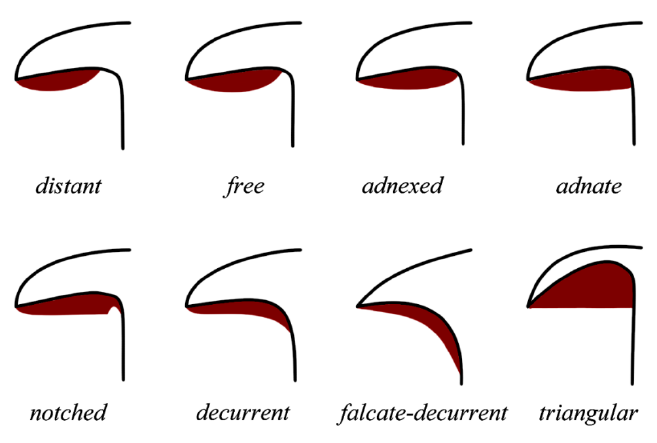
gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?

a    20.959408
d    16.915103
x    12.236914
p     9.338220
e     9.323363
s     9.323363
f     5.635616
Name: gill-attachment, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Attachments')

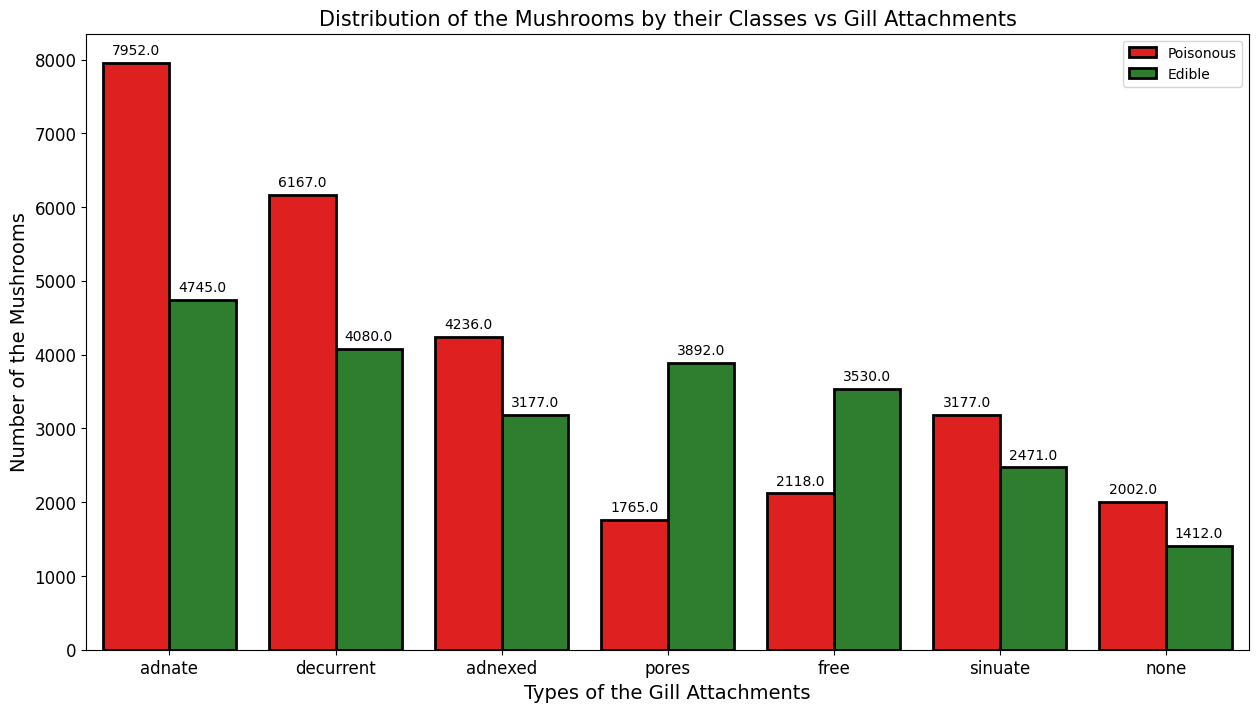

In [23]:
print(df['gill-attachment'].value_counts()*100/df.shape[0])
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='gill-attachment',
                      hue='class',
                      order=df['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
splot.set_xticklabels(['adnate', 'decurrent','adnexed','pores','free','sinuate','none'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Attachments', fontsize=15)

From the above figure we can see:
1) Most of mushroom have adnate type of gill attachment followed by decurrent and adnexed
2) Adnate and decuurent type of gill attachment mostly determine toxicity in the mushroom
3) Gill attachment having pores are mostly less poisionous

## Gill Spacing
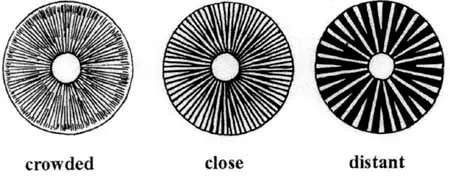
gill-spacing (n):   close=c, distant=d, none=f


c    40.743492
d    12.817973
f     5.635616
Name: gill-spacing, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Spacing')

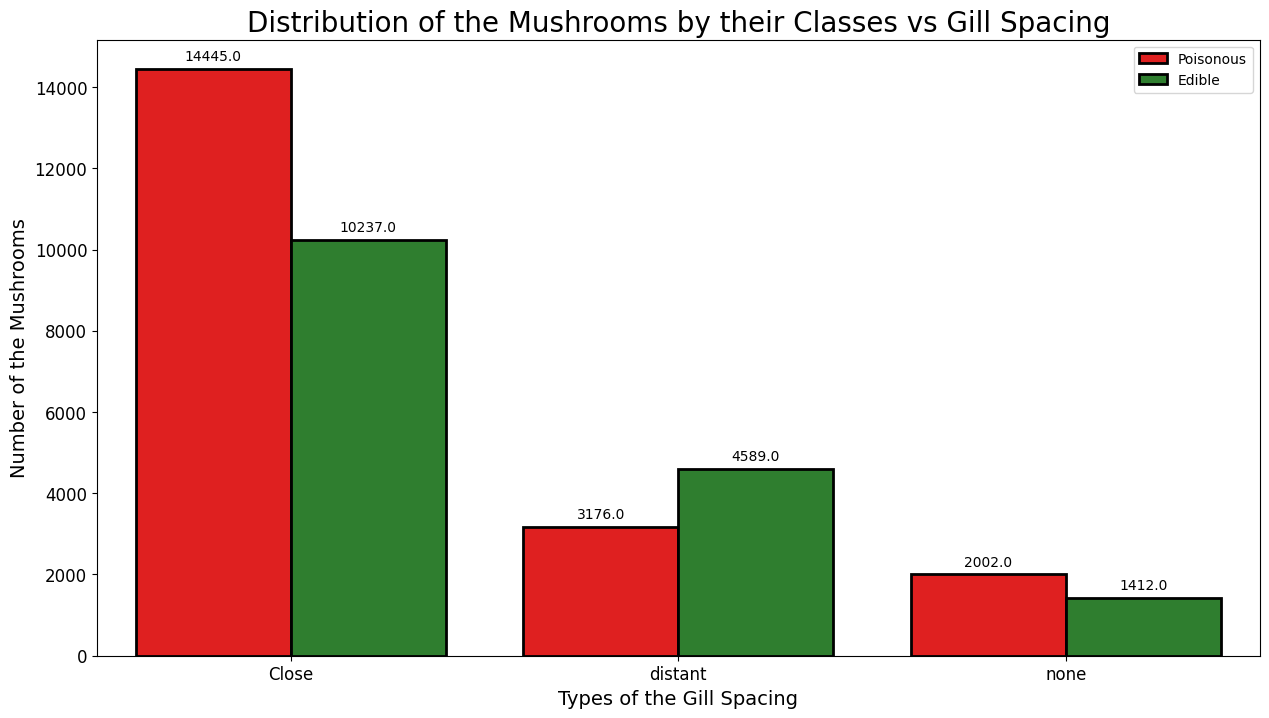

In [24]:
print((df['gill-spacing'].value_counts())*100/df.shape[0])
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='gill-spacing',
                      hue='class',
                      order=df['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'distant','none'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Spacing', fontsize=20)

From the above figure we can see:
1) About 40% of the gill spacing are have close structure
2) Gill spacing type is almost similar for all classes, close gill type is pretty more poisonous

## GILL COLOR:
gill-color (n):  brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k,none=f


w    30.525430
n    15.921359
y    15.188432
p     9.876360
g     6.797735
f     5.635616
o     4.801994
k     3.920501
r     2.309381
e     1.759686
u     1.688704
b     1.574803
Name: gill-color, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Colors')

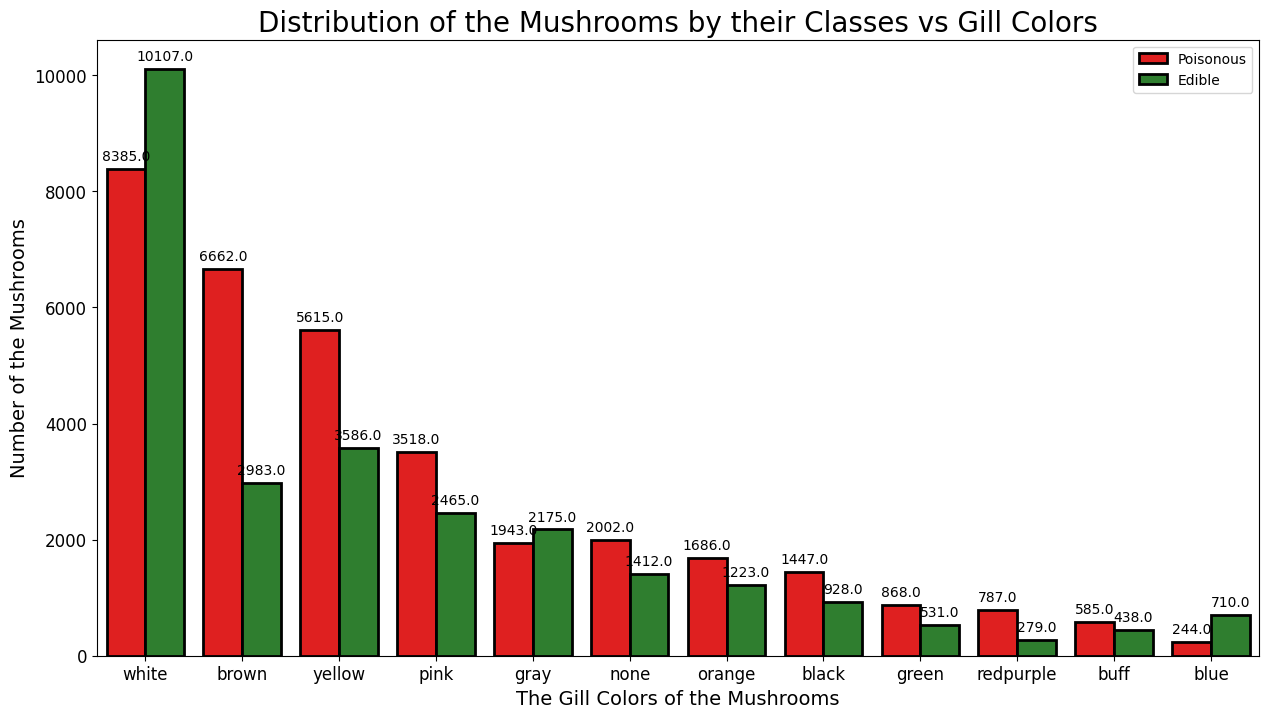

In [25]:
print(df['gill-color'].value_counts()*100/df.shape[0])
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='gill-color',
                      hue='class',
                      order=df['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['white', 'brown', 'yellow', 'pink', 'gray', 'none', 'orange', 'black', 'green','red' 'purple','buff','blue'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Colors', fontsize=20)

From the figure we can see that:
1) About 30% of the mushrooms have gills with white colors
2) Brown and yellow colors gill mostly determines high chance of toxicity


## STEM HEIGHT

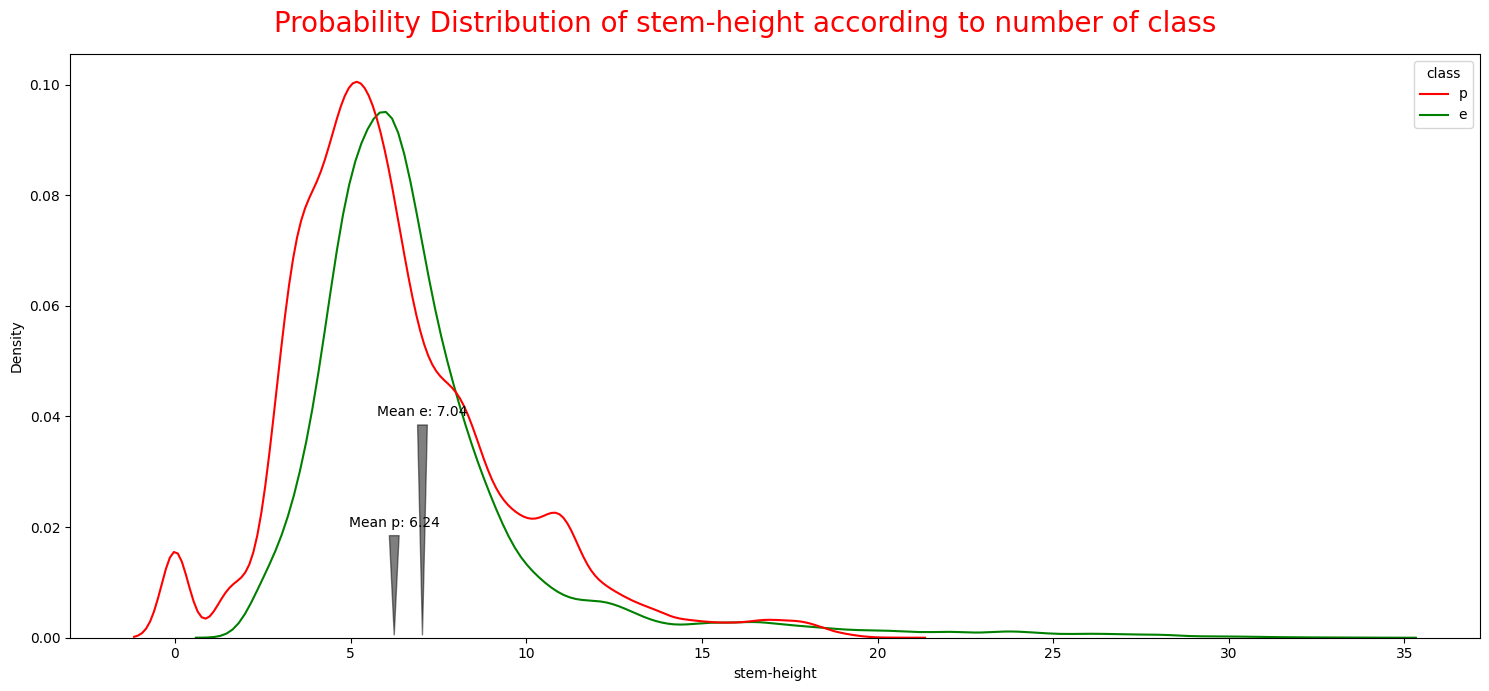

In [26]:
plt.figure(figsize=(15,7))
plt.suptitle("Probability Distribution of stem-height according to number of class", fontsize=20, color="Red")

sns.kdeplot(data=df, x='stem-height',hue = 'class',palette=['red', 'green'])
# Calculate and annotate the mean for each class
for cls in df['class'].unique():
    mean_value = df[df['class'] == cls]['stem-height'].mean()
    plt.annotate(f'Mean {cls}: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value, 0.02 * (df['class'].unique().tolist().index(cls) + 1)),
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 fontsize=10, ha='center')

plt.tight_layout()
plt.show()

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3477772768.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




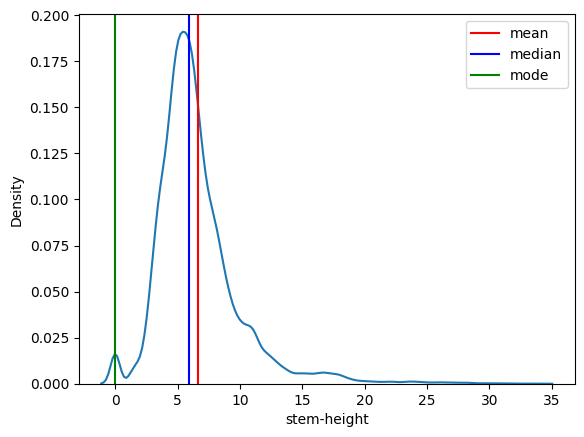

In [27]:
a = df['stem-height']

# Calculate the mean, median, and mode of the stem-height values
mean = a.mean()
median = np.median(a)
mode = a.mode()

# Plot a distribution plot of the stem-height values
sns.distplot(a, hist=False)

# Add vertical lines for the mean, median, and mode
plt.axvline(mean, color='r', label='mean')
plt.axvline(median, color='b', label='median')
plt.axvline(mode[0], color='g', label='mode')

# Display a legend and show the plot
plt.legend()
plt.show()

From the above figures we can see that:
1) Stem height is almost normally distributed
2) On an average edible mushroom has slightly longer stem height as compared to the poisionous one

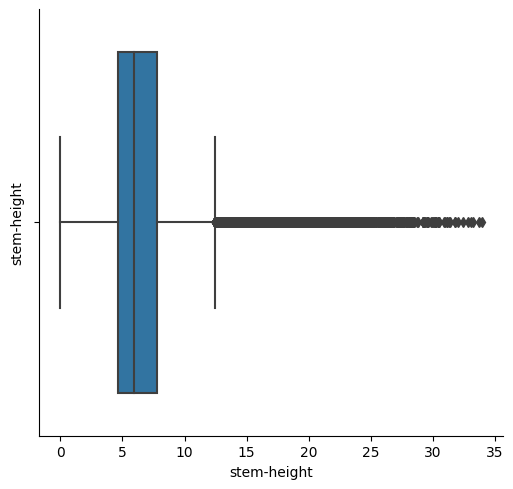

In [28]:
# Plot a box plot of the stem height
sns.catplot( x = 'stem-height',kind = "box",data=df)
plt.ylabel("stem-height")
plt.show()

In [29]:
# Assuming 'X' is your variable with non-normal distribution
df['log-transformed-stem-height'] = np.log1p(df['stem-height'])
df['log-transformed-stem-height']

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\4098745195.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        2.887590
1        2.943913
2        2.933857
3        2.819592
4        2.863914
           ...   
61064    1.595339
61065    1.430311
61066    1.581038
61067    1.517323
61068    1.446919
Name: log-transformed-stem-height, Length: 60579, dtype: float64

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\2406623717.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




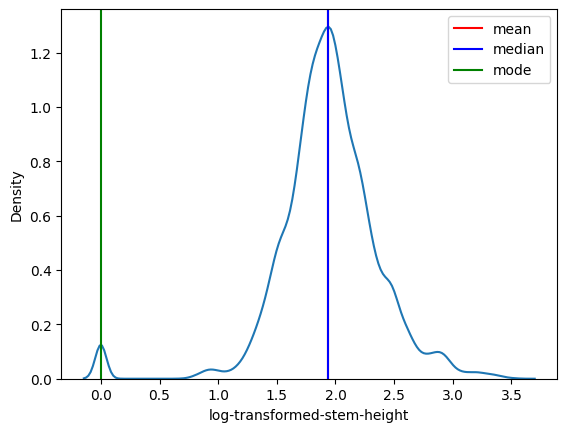

In [30]:
a=df['log-transformed-stem-height']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [31]:
# Calculate skewness of the log-transformed-stem-height' column
from scipy.stats import skew
skewness = skew(df['log-transformed-stem-height'])
print(f"Skewness for 'column': {skewness}")


Skewness for 'column': -0.9165190092716332


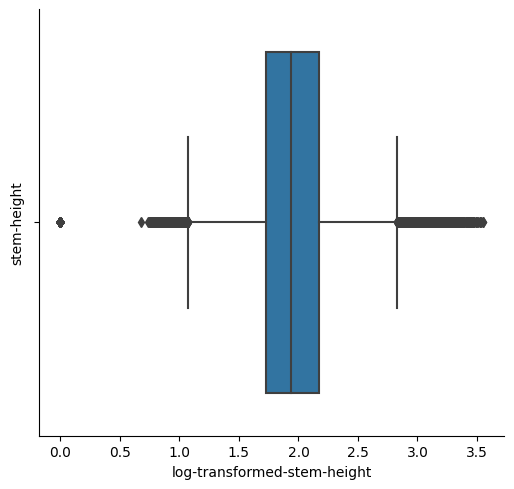

In [32]:
# Plot a box plot of the stem height
sns.catplot( x = 'log-transformed-stem-height',kind = "box",data=df)
plt.ylabel("stem-height")
plt.show()

In [33]:
from scipy.stats import boxcox
# Adding a constant to make the variable positive
positive_X = df['stem-height'] + abs(df['stem-height'].min()) + 1  # Add 1 to handle zero values

# Applying Box-Cox transformation
transformed_X, lambda_value = boxcox(positive_X)

# Add the transformed values to your DataFrame
df['boxcox-transformed-stem-height'] = transformed_X
df

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\2565674343.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  veil-color has-ring ring-type spore-print-color  \
0            16.95  ...           w        t         g               NaN   
1            17.99  ...           w        t         g               NaN   
2            17.80  ...           w        t         g               NaN   
3            15.77  ...           w        t         p               NaN   
4            16.53  ...           w        t         p               NaN   
...            ...  ...         ...      ...       ...               ...   
61064         3.93  ...         NaN        f         f               NaN   
61065         3.18  ...         NaN        f         f               NaN   
61066         3.86  ...         NaN        f         f               NaN   
61067         3.56  ...         NaN        f         f               NaN   
61068         3.25  ...         NaN        f         f               NaN   

      habitat season log-transformed-cap-diameter  \
0           d      w                     2.788708   
1           d      u                     2.867899   
2           d      w                     2.712706   
3           d      w                     2.719320   
4           d      w                     2.749832   
...       ...    ...                          ...   
61064       d      a                     0.779325   
61065       d      a                     0.819780   
61066       d      u                     0.819780   
61067       d      u                     0.806476   
61068       d      u                     0.774727   

      boxcox-transformed-cap-diameter log-transformed-stem-height  \
0                            2.672059                    2.887590   
1                            2.741842                    2.943913   
2                            2.605019                    2.933857   
3                            2.610855                    2.819592   
4                            2.637774                    2.863914   
...                               ...                         ...   
61064                        0.924032                    1.595339   
61065                        0.957396                    1.430311   
61066                        0.957396                    1.581038   
61067                        0.946407                    1.517323   
61068                        0.920250                    1.446919   

      boxcox-transformed-stem-height  
0             

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\2268994631.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




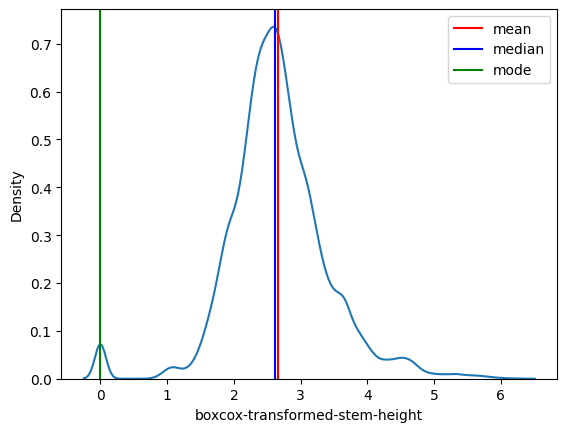

In [34]:
a=df['boxcox-transformed-stem-height']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [35]:
# Apply the function to remove outliers from 'retail_shop_num'
df = remove_outliers(df, 'boxcox-transformed-stem-height')

# Display the filtered DataFrame
df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
7         p         14.86         x           h         e   
8         p         12.85         f           g         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
7                        f               e          NaN          w   
8                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  veil-color has-ring ring-type spore-print-color  \
0            16.95  ...           w        t         g               NaN   
3            15.77  ...           w        t         p               NaN   
4            16.53  ...           w        t         p               NaN   
7            17.03  ...           w        t         p               NaN   
8            17.27  ...           w        t         p               NaN   
...            ...  ...         ...      ...       ...               ...   
61064         3.93  ...         NaN        f         f               NaN   
61065         3.18  ...         NaN        f         f               NaN   
61066         3.86  ...         NaN        f         f               NaN   
61067         3.56  ...         NaN        f         f               NaN   
61068         3.25  ...         NaN        f         f               NaN   

      habitat season log-transformed-cap-diameter  \
0           d      w                     2.788708   
3           d      w                     2.719320   
4           d      w                     2.749832   
7           d      u                     2.763800   
8           d      a                     2.628285   
...       ...    ...                          ...   
61064       d      a                     0.779325   
61065       d      a                     0.819780   
61066       d      u                     0.819780   
61067       d      u                     0.806476   
61068       d      u                     0.774727   

      boxcox-transformed-cap-diameter log-transformed-stem-height  \
0                            2.672059                    2.887590   
3                            2.610855                    2.819592   
4                            2.637774                    2.863914   
7                            2.650095                    2.892037   
8                            2.530487                    2.905260   
...                               ...                         ...   
61064                        0.924032                    1.595339   
61065                        0.957396                    1.430311   
61066                        0.957396                    1.581038   
61067                        0.946407                    1.517323   
61068                        0.920250                    1.446919   

      boxcox-transformed-stem-height  
0             

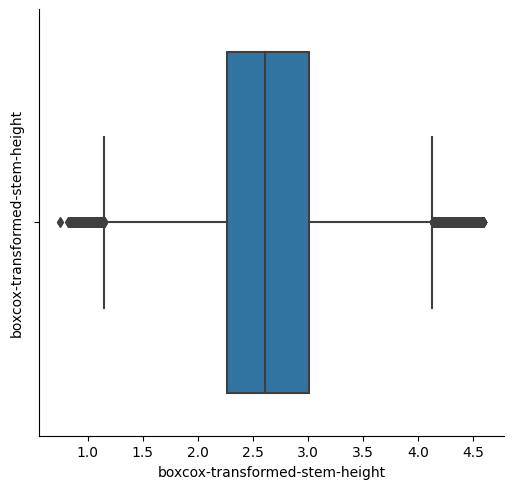

In [36]:
# Plot a box plot of the stem height
sns.catplot( x = 'boxcox-transformed-stem-height',kind = "box",data=df)
plt.ylabel("boxcox-transformed-stem-height")
plt.show()


## STEM WIDTH 

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3164730535.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




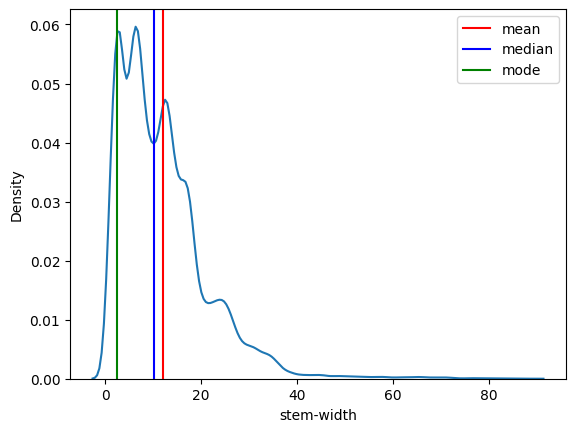

In [37]:
a=df['stem-width']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

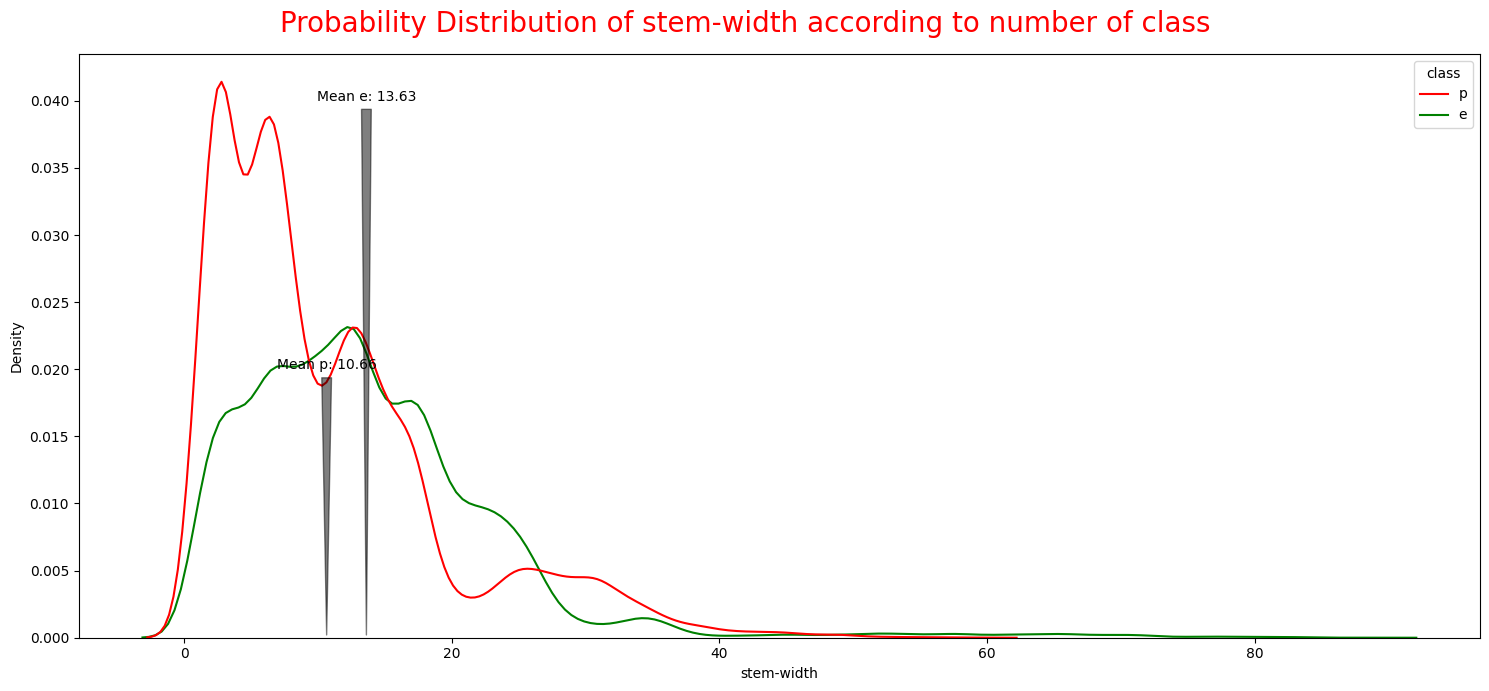

In [38]:

plt.figure(figsize=(15,7))
plt.suptitle("Probability Distribution of stem-width according to number of class", fontsize=20, color="Red")

sns.kdeplot(data=df, x='stem-width',hue = 'class',palette=['red', 'green'])
# Calculate and annotate the mean for each class
for cls in df['class'].unique():
    mean_value = df[df['class'] == cls]['stem-width'].mean()
    plt.annotate(f'Mean {cls}: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value, 0.02 * (df['class'].unique().tolist().index(cls) + 1)),
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 fontsize=10, ha='center')

plt.tight_layout()
plt.show()

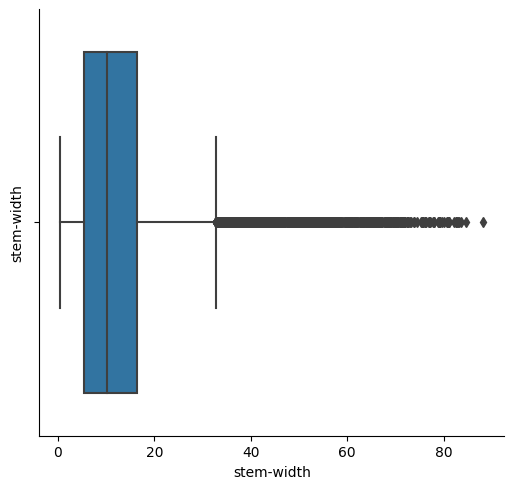

In [39]:
# Plot a box plot of the stem width
sns.catplot( x = 'stem-width',kind = "box",data=df)
plt.ylabel("stem-width")
plt.show()

In [40]:
# Assuming 'X' is your variable with non-normal distribution
df['log-transformed-stem-width'] = np.log1p(df['stem-width'])
df['log-transformed-stem-width']

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\53880255.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        2.895359
3        2.832036
4        2.901422
7        2.914522
8        2.980111
           ...   
61064    1.976855
61065    1.860975
61066    1.997418
61067    1.862529
61068    1.864080
Name: log-transformed-stem-width, Length: 58649, dtype: float64

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\2222226162.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




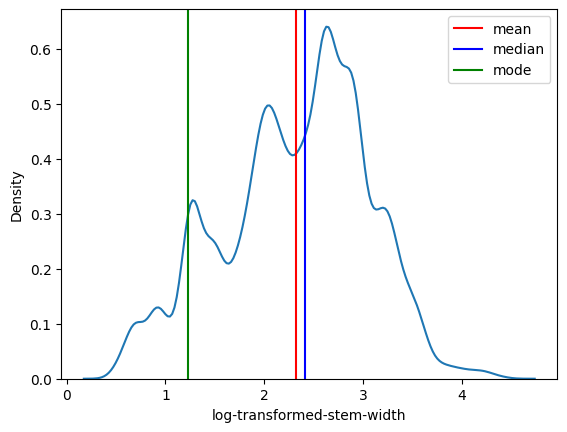

In [41]:
a=df['log-transformed-stem-width']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [42]:
from scipy.stats import boxcox
# Adding a constant to make the variable positive
positive_X = df['stem-width'] + abs(df['stem-width'].min()) + 1  # Add 1 to handle zero values

# Applying Box-Cox transformation
transformed_X, lambda_value = boxcox(positive_X)

# Add the transformed values to your DataFrame
df['boxcox-transformed-stem-width'] = transformed_X
df

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3672787983.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
7         p         14.86         x           h         e   
8         p         12.85         f           g         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
7                        f               e          NaN          w   
8                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  ring-type spore-print-color habitat season  \
0            16.95  ...          g               NaN       d      w   
3            15.77  ...          p               NaN       d      w   
4            16.53  ...          p               NaN       d      w   
7            17.03  ...          p               NaN       d      u   
8            17.27  ...          p               NaN       d      a   
...            ...  ...        ...               ...     ...    ...   
61064         3.93  ...          f               NaN       d      a   
61065         3.18  ...          f               NaN       d      a   
61066         3.86  ...          f               NaN       d      u   
61067         3.56  ...          f               NaN       d      u   
61068         3.25  ...          f               NaN       d      u   

      log-transformed-cap-diameter boxcox-transformed-cap-diameter  \
0                         2.788708                        2.672059   
3                         2.719320                        2.610855   
4                         2.749832                        2.637774   
7                         2.763800                        2.650095   
8                         2.628285                        2.530487   
...                            ...                             ...   
61064                     0.779325                        0.924032   
61065                     0.819780                        0.957396   
61066                     0.819780                        0.957396   
61067                     0.806476                        0.946407   
61068                     0.774727                        0.920250   

      log-transformed-stem-height boxcox-transformed-stem-height  \
0                        2.887590                       4.544084   
3                        2.819592                       4.386988   
4                        2.863914                       4.489029   
7                        2.892037                       4.554468   
8                        2.905260                       4.585423   
...                           ...                            ...   
61064                    1.595339                       2.034537   
61065                    1.430311                       1.777265   
61066                    1.581038                       2.011746   
61067                    1.517323                       1.

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3767391135.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




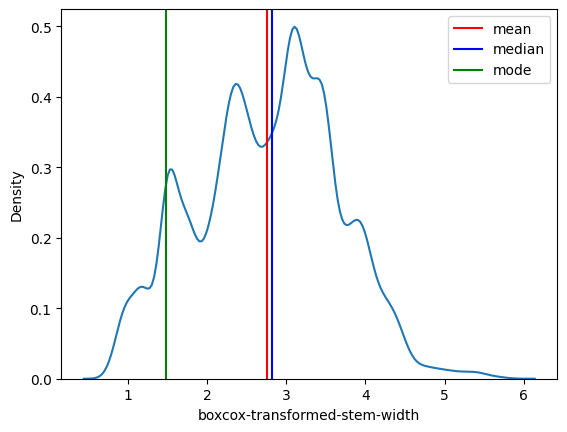

In [43]:
a=df['boxcox-transformed-stem-width']
mean=a.mean()
median=np.median(a)
mode=a.mode()
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [44]:
# Calculate skewness of the 'workers_num' column
from scipy.stats import skew
skewness = skew(df['log-transformed-stem-width'])
print(f"Skewness for 'column': {skewness}")
# Calculate skewness of the 'workers_num' column
from scipy.stats import skew
skewness = skew(df['boxcox-transformed-stem-width'])
print(f"Skewness for 'column': {skewness}")

Skewness for 'column': -0.2768600133293283
Skewness for 'column': -0.012366640480007268


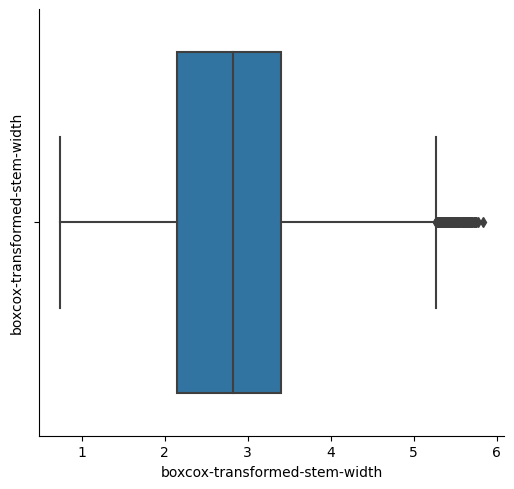

In [45]:
# Plot a box plot of the stem height
sns.catplot( x = 'boxcox-transformed-stem-width',kind = "box",data=df)
plt.ylabel("boxcox-transformed-stem-width")
plt.show()

In [46]:
# Apply the function to remove outliers from 'retail_shop_num'
df = remove_outliers(df, "boxcox-transformed-stem-width")

# Display the filtered DataFrame
df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
7         p         14.86         x           h         e   
8         p         12.85         f           g         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
7                        f               e          NaN          w   
8                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  ring-type spore-print-color habitat season  \
0            16.95  ...          g               NaN       d      w   
3            15.77  ...          p               NaN       d      w   
4            16.53  ...          p               NaN       d      w   
7            17.03  ...          p               NaN       d      u   
8            17.27  ...          p               NaN       d      a   
...            ...  ...        ...               ...     ...    ...   
61064         3.93  ...          f               NaN       d      a   
61065         3.18  ...          f               NaN       d      a   
61066         3.86  ...          f               NaN       d      u   
61067         3.56  ...          f               NaN       d      u   
61068         3.25  ...          f               NaN       d      u   

      log-transformed-cap-diameter boxcox-transformed-cap-diameter  \
0                         2.788708                        2.672059   
3                         2.719320                        2.610855   
4                         2.749832                        2.637774   
7                         2.763800                        2.650095   
8                         2.628285                        2.530487   
...                            ...                             ...   
61064                     0.779325                        0.924032   
61065                     0.819780                        0.957396   
61066                     0.819780                        0.957396   
61067                     0.806476                        0.946407   
61068                     0.774727                        0.920250   

      log-transformed-stem-height boxcox-transformed-stem-height  \
0                        2.887590                       4.544084   
3                        2.819592                       4.386988   
4                        2.863914                       4.489029   
7                        2.892037                       4.554468   
8                        2.905260                       4.585423   
...                           ...                            ...   
61064                    1.595339                       2.034537   
61065                    1.430311                       1.777265   
61066                    1.581038                       2.011746   
61067                    1.517323                       1.

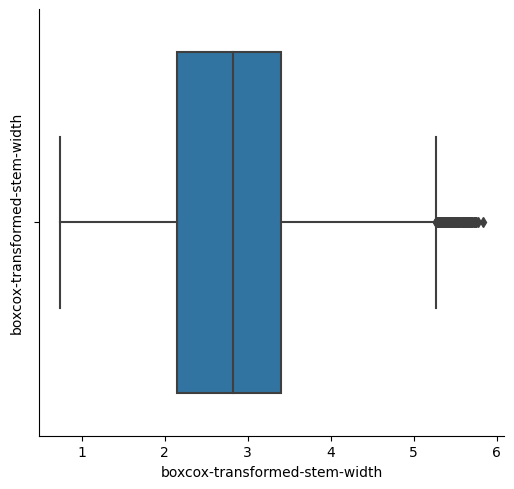

In [47]:
# Plot a box plot of the stem height
sns.catplot( x = 'boxcox-transformed-stem-width',kind = "box",data=df)
plt.ylabel("boxcox-transformed-stem-width")
plt.show()

From the image we can see:
1)  The green line for edible mushrooms is wider than the red line for poisonous mushrooms. This means that there is a greater range of stem widths for edible mushrooms than for poisonous mushrooms.
2) On an average, edible mushrooms tend to have thicker stems than poisonous mushrooms.
3) On an average poisonous mushrooms tend to have thinner stems than edible mushrooms.

## STEM ROOT
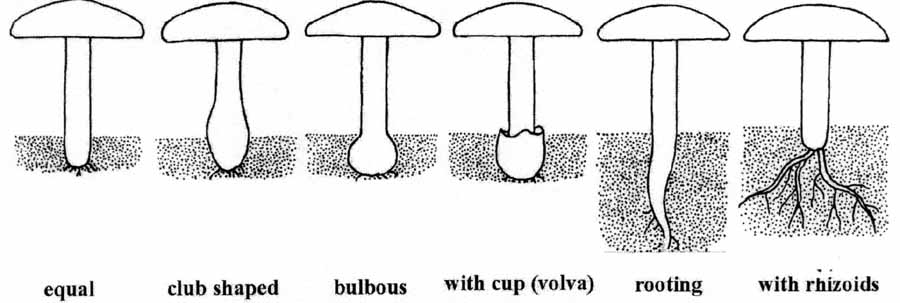
stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r


b    5.416972
s    4.388822
r    2.383672
c    1.203772
Name: stem-root, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stem root')

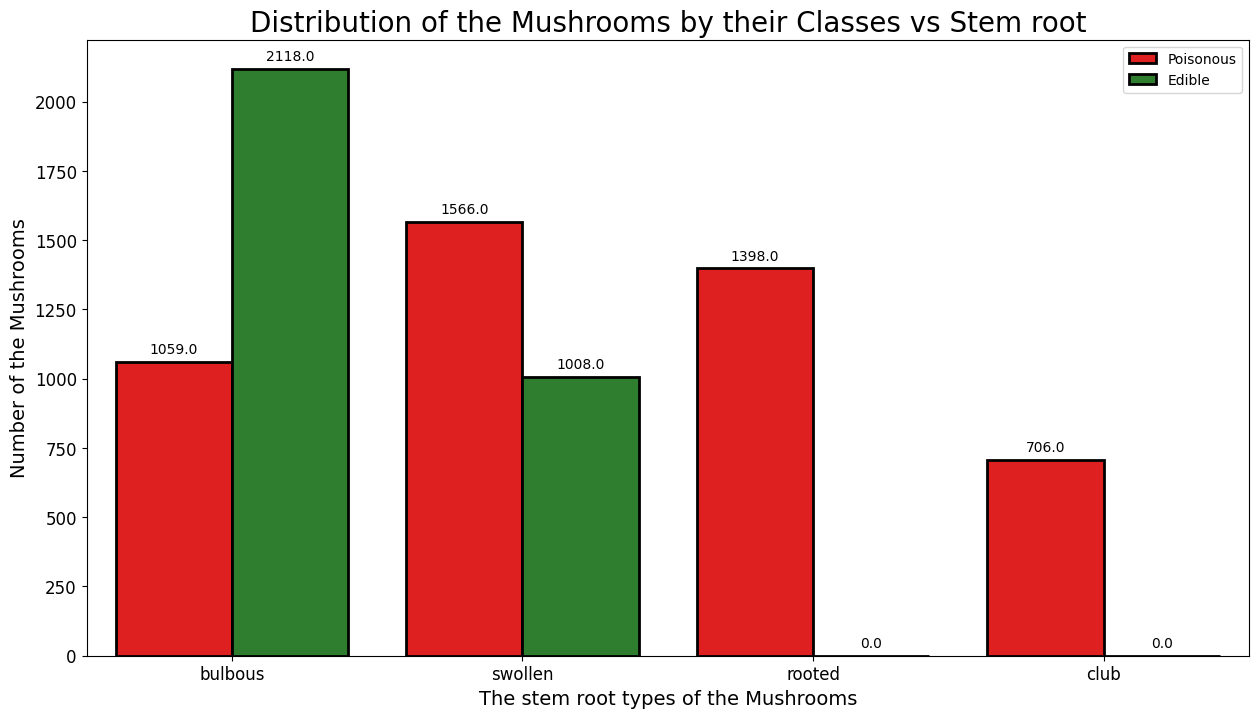

In [48]:
print(df['stem-root'].value_counts()*100/df.shape[0])

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='stem-root',
                      hue='class',
                      order=df['stem-root'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['bulbous', 'swollen', 'rooted', 'club'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The stem root types of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stem root', fontsize=20)

From the above dataset we can see that:
1) about 85% of the data is missing in column,
2) we can't draw any final conclusion since the dataset is very less, but from the above graph we can observe that bulbous root stem is mostly edible, rooted, f(unknown) and clubbed type of stem root are all poisionous

## Stem surface:

stem-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e,none=f


s    9.889342
y    7.993316
i    7.495439
t    4.508176
g    2.988968
k    2.109158
h    0.912207
Name: stem-surface, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stem surface')

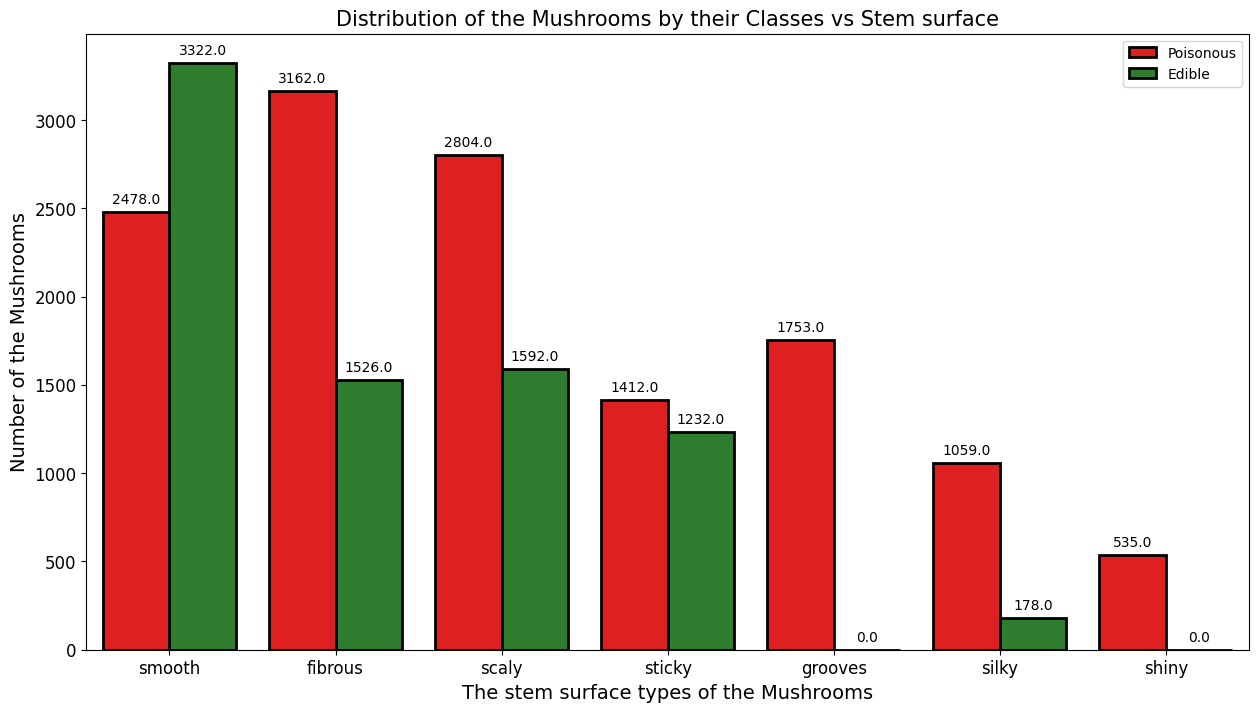

In [49]:
print(df['stem-surface'].value_counts()*100/df.shape[0])

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='stem-surface',
                      hue='class',
                      order=df['stem-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['smooth', 'fibrous', 'scaly', 'sticky', 'grooves','silky','shiny'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The stem surface types of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stem surface', fontsize=15)

From the above code we can see that:
1) Since most of the data is missing in the column we can draw any final insights from the column, but from the above graph we can see 
1.1) The most common type of stem surface for both edible and poisonous mushrooms is smooth, followed by scaly and fibrous
1.2) Stem have smooth surface are mostly edible
1.3)  Stem having fibrous, sticty grooves and shiny surface are mostly poisionous

## stem-color
stem-color (n):brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f

w    38.224011
n    29.668025
y    13.405173
g     4.477485
o     3.728964
e     3.493666
u     2.540538
p     1.747685
k     1.109993
r     0.924142
l     0.385343
b     0.294975
Name: stem-color, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stem color')

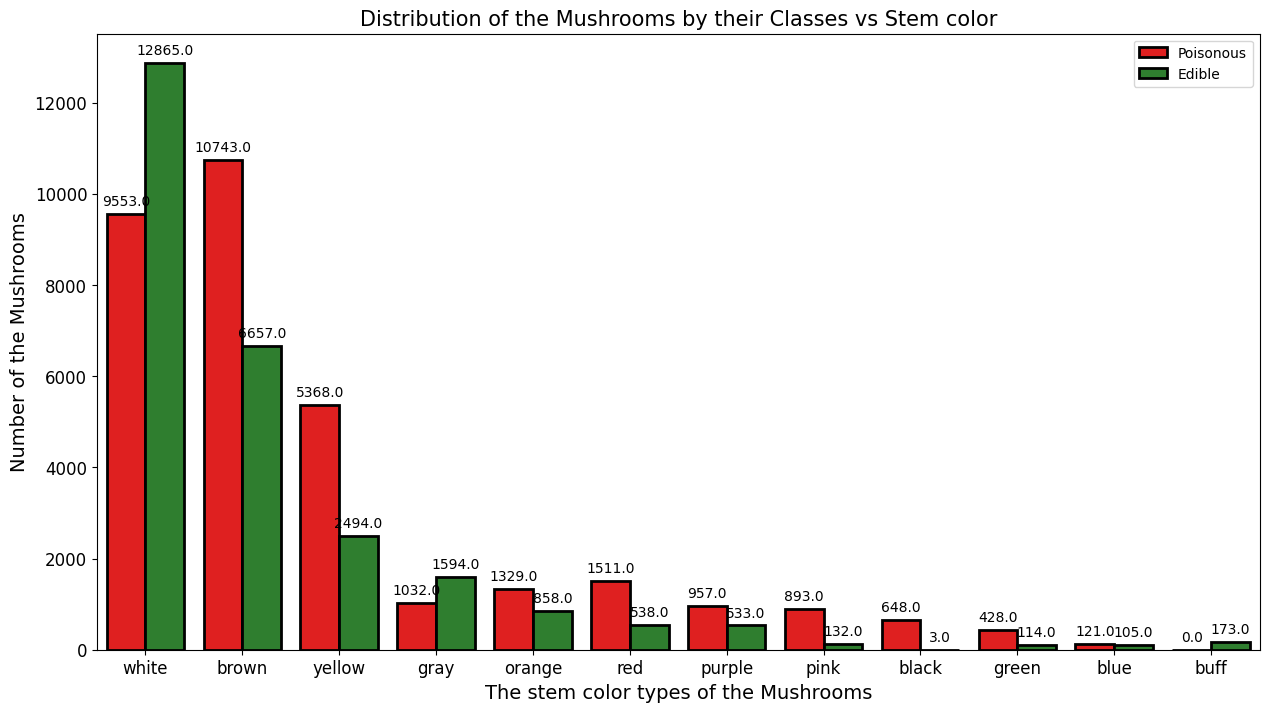

In [50]:
print(df['stem-color'].value_counts()*100/df.shape[0])
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='stem-color',
                      hue='class',
                      order=df['stem-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['white', 'brown', 'yellow', 'gray','orange','red','purple','pink','black','green','blue','buff'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The stem color types of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stem color', fontsize=15)

from the above graph we can see:
1) white stem color are mostly edible
2) brown color and yellow color stems are mostly poisionous

Veil types:
    
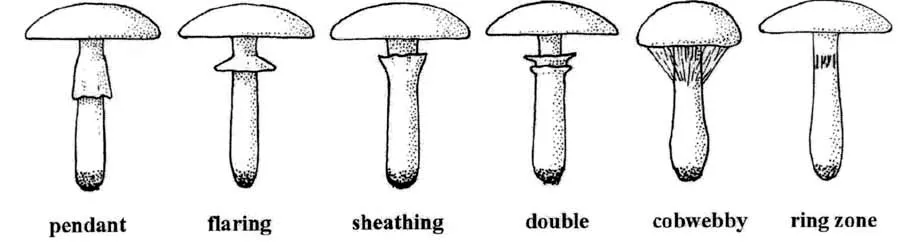

veil-type (n):   partial=p, universal=u


In [51]:
df['veil-type'].value_counts()

u    2978
Name: veil-type, dtype: int64

In [52]:
df['veil-color'].value_counts()*100/df.shape[0]

w    8.994186
y    0.898566
n    0.895156
u    0.601886
k    0.601886
e    0.308616
Name: veil-color, dtype: float64

## HAS RING
ring=t, none=f

f    76.045627
t    23.954373
Name: has-ring, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Ring presence')

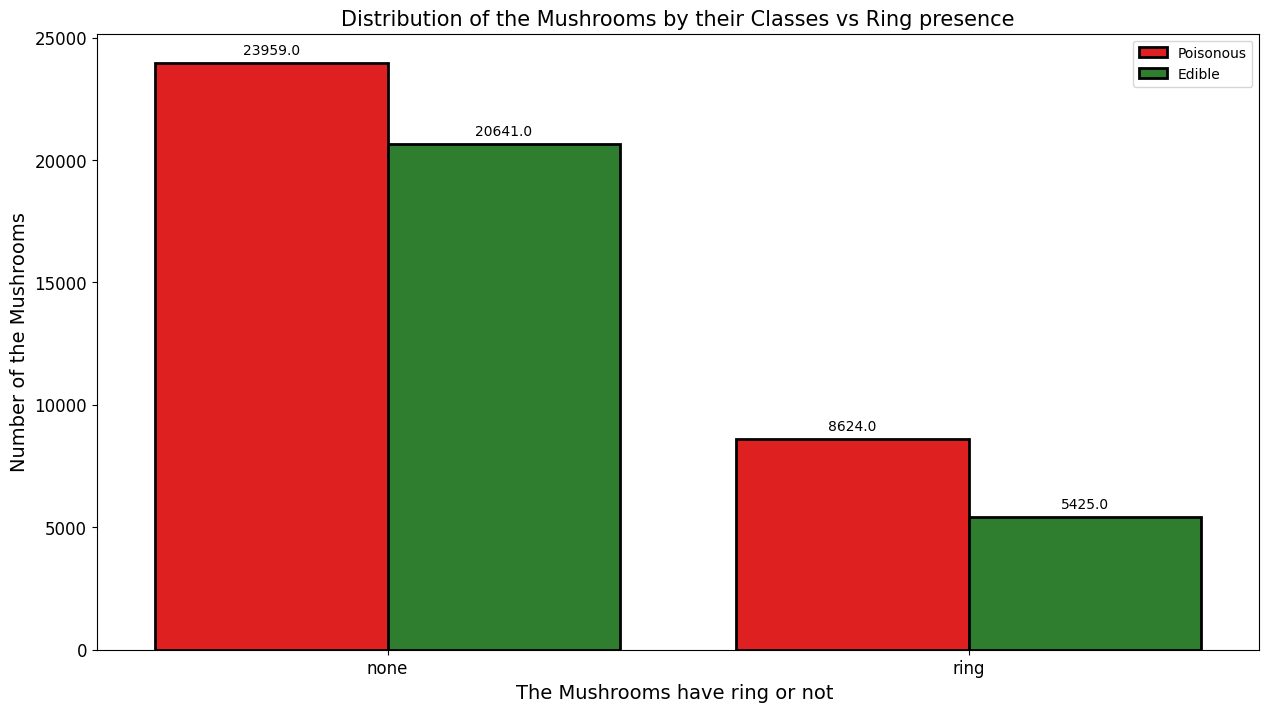

In [53]:
print(df['has-ring'].value_counts()*100/df.shape[0])

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='has-ring',
                      hue='class',
                      order=df['has-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['none','ring'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Mushrooms have ring or not ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Ring presence', fontsize=15)

Mostly Musrooms have no rings 

## Ring type
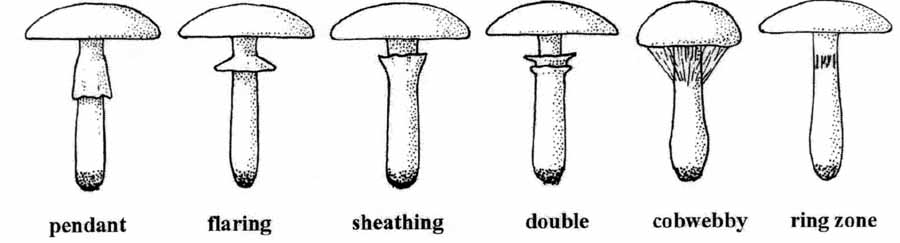
cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?


In [54]:
print(df['ring-type'].value_counts().head(n=len(df['ring-type'])))

f    46718
e     2210
z     2118
l     1427
r     1397
p     1169
g     1137
m        2
Name: ring-type, dtype: int64


In [55]:
df['ring-type']

0        g
3        p
4        p
7        p
8        p
        ..
61064    f
61065    f
61066    f
61067    f
61068    f
Name: ring-type, Length: 58649, dtype: object

In [56]:
df.drop('has-ring',inplace = True,axis = 1)

f    79.656942
e     3.768180
z     3.611315
l     2.433119
r     2.381967
p     1.993214
g     1.938652
m     0.003410
Name: ring-type, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Ring type')

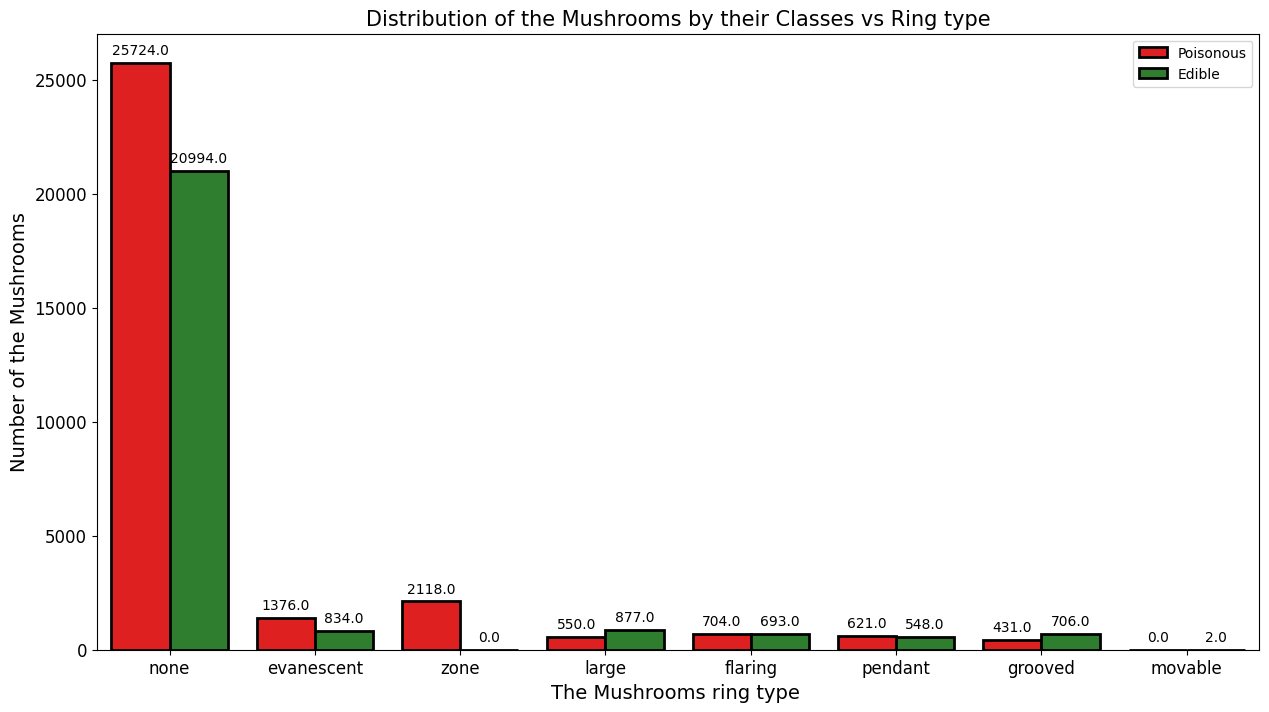

In [57]:
print(df['ring-type'].value_counts()*100/df.shape[0])

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='ring-type',
                      hue='class',
                      order=df['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['none','evanescent','zone','large','flaring','pendant','grooved','movable'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Mushrooms ring type ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Ring type', fontsize=15)

In [58]:
# categories_to_combine = ['l', 'r', 'p','g','m']

# # Create a new column 'new_column' with combined categories
# df['ring-type'] = df['ring-type'].apply(lambda x: x if x not in categories_to_combine else 'other')

# # Display the modified DataFrame
# df['ring-type'].value_counts()

From the above dataset we can see:
About 80% of mushroom have the ring type as none

In [59]:
df['spore-print-color'].value_counts()*100/df.shape[0]

k    3.611315
p    2.146669
w    2.066531
n    1.200361
g    0.601886
u    0.310321
r    0.291565
Name: spore-print-color, dtype: float64

## Habitats
habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d


d    71.820491
g    13.400058
l     5.401627
m     4.670156
h     3.411823
p     0.613821
w     0.601886
u     0.080138
Name: habitat, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Habitats')

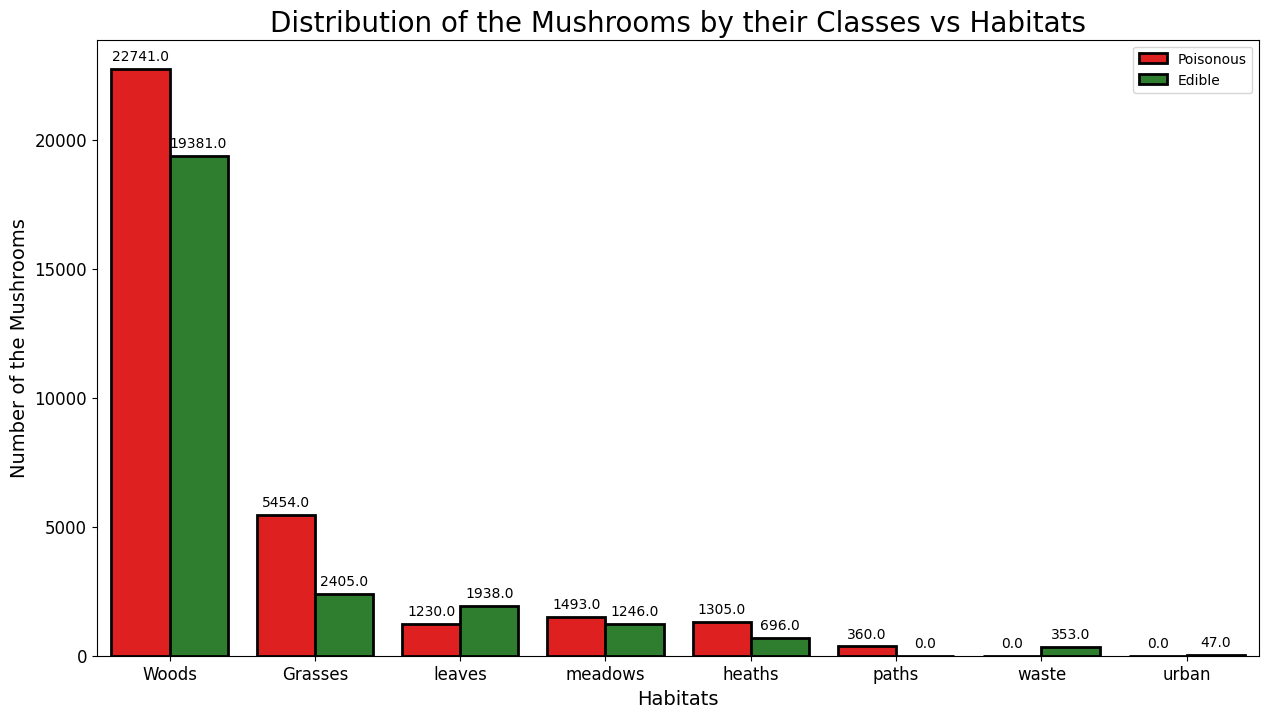

In [60]:
plt.figure(figsize=(15, 8))
print(df['habitat'].value_counts()*100/df.shape[0])
splot = sns.countplot(data=df, x='habitat',
                      hue='class',
                      order=df['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'leaves', 'meadows', 'heaths', 'paths', 'waste','urban'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)

In [61]:
# categories_to_combine = ['p', 'w', 'u']

# # Create a new column 'new_column' with combined categories
# df['habitat'] = df['habitat'].apply(lambda x: x if x not in categories_to_combine else 'other')

# # Display the modified DataFrame
# df['habitat'].value_counts()

### From the above graph we can see:
Woodland and forest environment provides the best environment where they can thrive

## SEASON:
season (n): Sring=s, summer=u, autumn=a, winter=w


a    50.179884
u    37.415813
w     8.424696
s     3.979607
Name: season, dtype: float64


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Season')

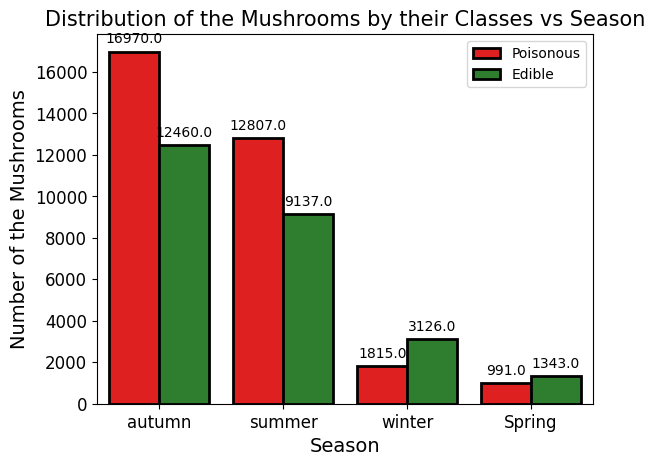

In [62]:
print(df['season'].value_counts()*100/df.shape[0])
splot = sns.countplot(data=df, x='season',
                      hue='class',
                      order=df['season'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['autumn', 'summer', 'winter', 'Spring',])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Season', fontsize=15)

In [63]:
# Calculate the percentage of missing values for each column in the dataframe
df.isna().sum()*100/df.shape[0]

class                               0.000000
cap-diameter                        0.000000
cap-shape                           0.000000
cap-surface                        24.075432
cap-color                           0.000000
does-bruise-or-bleed                0.000000
gill-attachment                    15.597879
gill-spacing                       40.798650
gill-color                          0.000000
stem-height                         0.000000
stem-width                          0.000000
stem-root                          86.606762
stem-surface                       64.103395
stem-color                          0.000000
veil-type                          94.922335
veil-color                         87.699705
ring-type                           4.213201
spore-print-color                  89.771352
habitat                             0.000000
season                              0.000000
log-transformed-cap-diameter        0.000000
boxcox-transformed-cap-diameter     0.000000
log-transf

In [64]:
# Removing unnecessary columns from the DataFrame
df.drop(['stem-root','veil-type','veil-color','spore-print-color','cap-diameter','stem-height','stem-width','log-transformed-cap-diameter','log-transformed-stem-height','log-transformed-stem-width'],axis = 1,inplace = True)

<Axes: >

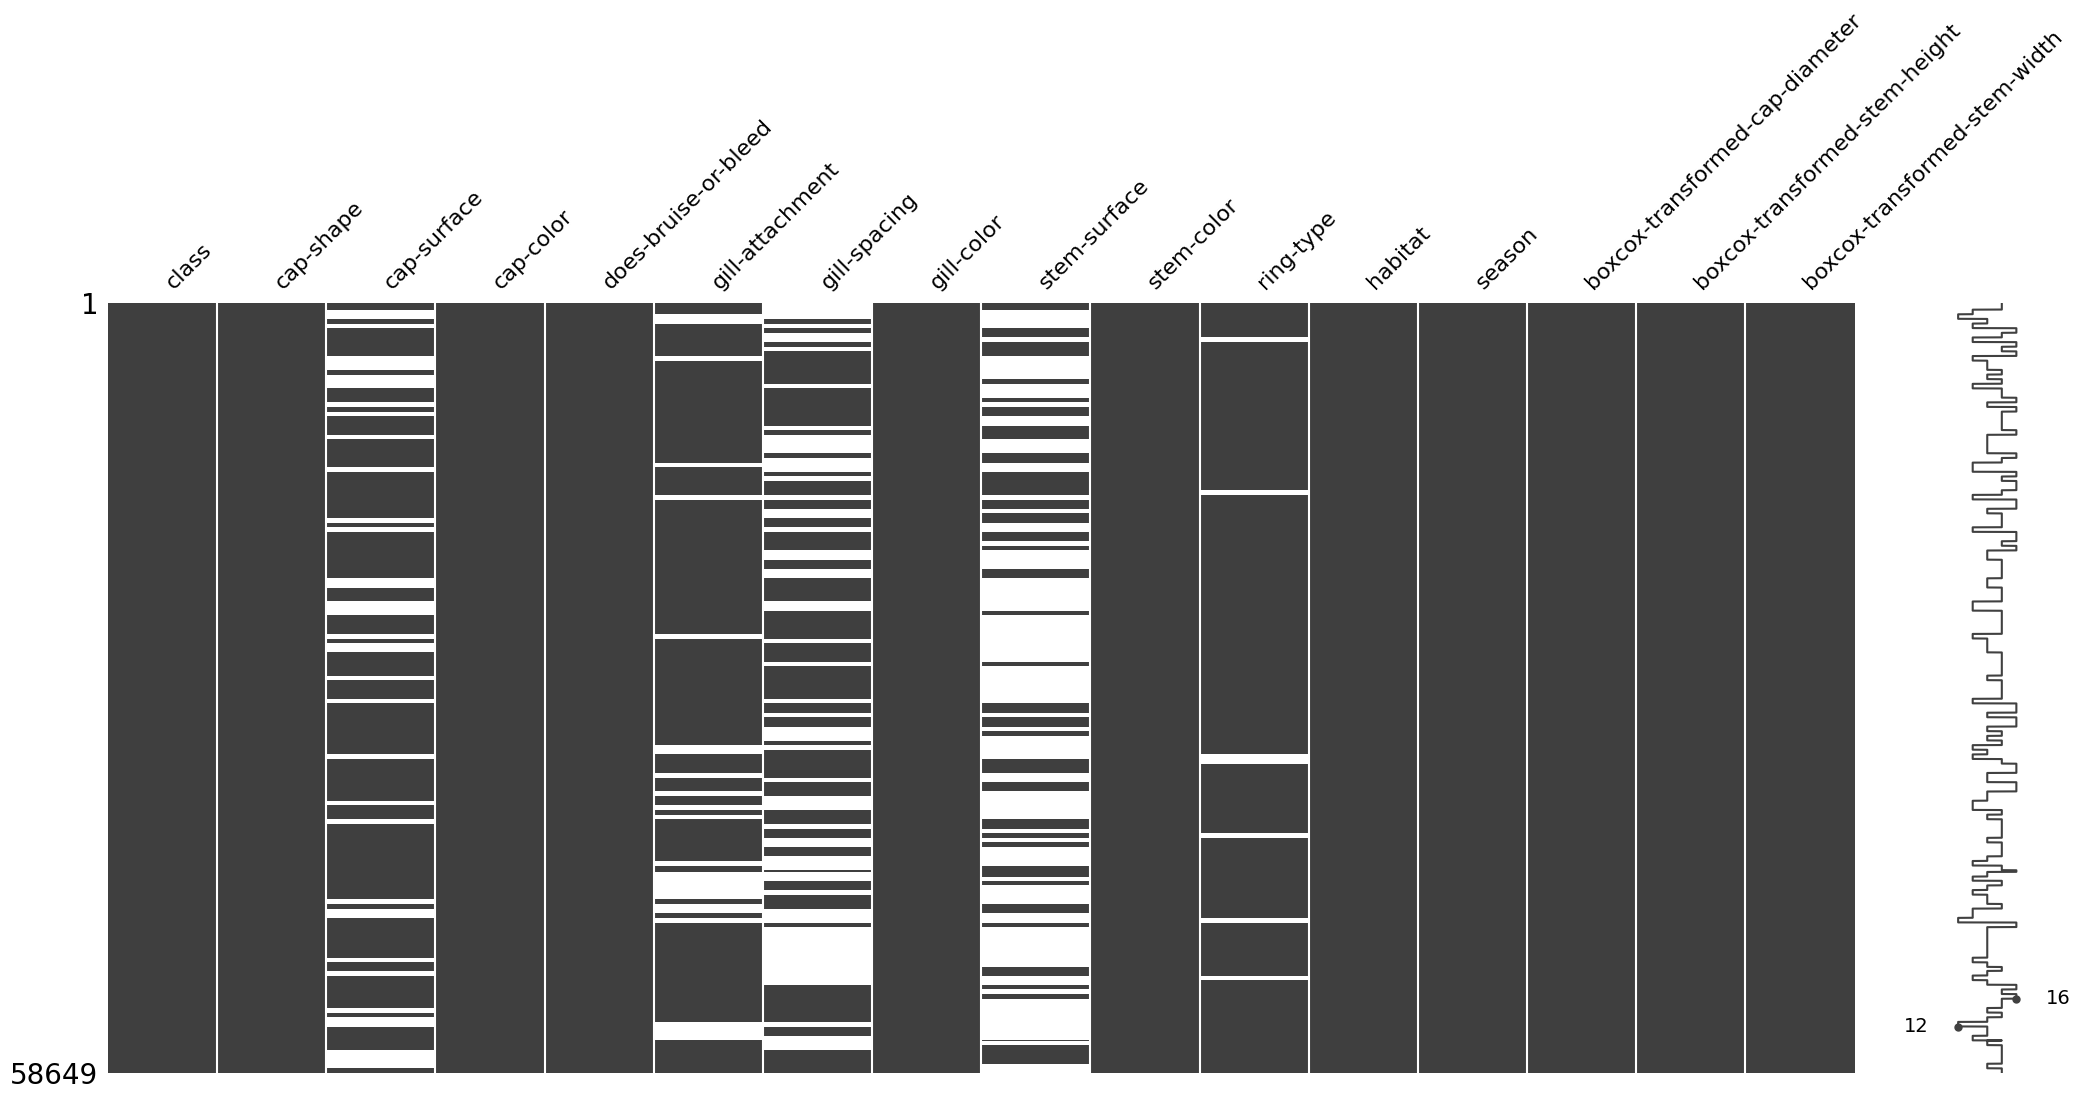

In [65]:
# Checking weather the missing values are (1) Missing Completely at Random (MCAR), (2) Missing at Random (MAR), and (3) Missing Not at Random (MNAR).
import missingno as msno
# Display a matrix visualization of missing values in the dataframe
msno.matrix(df)

<Axes: >

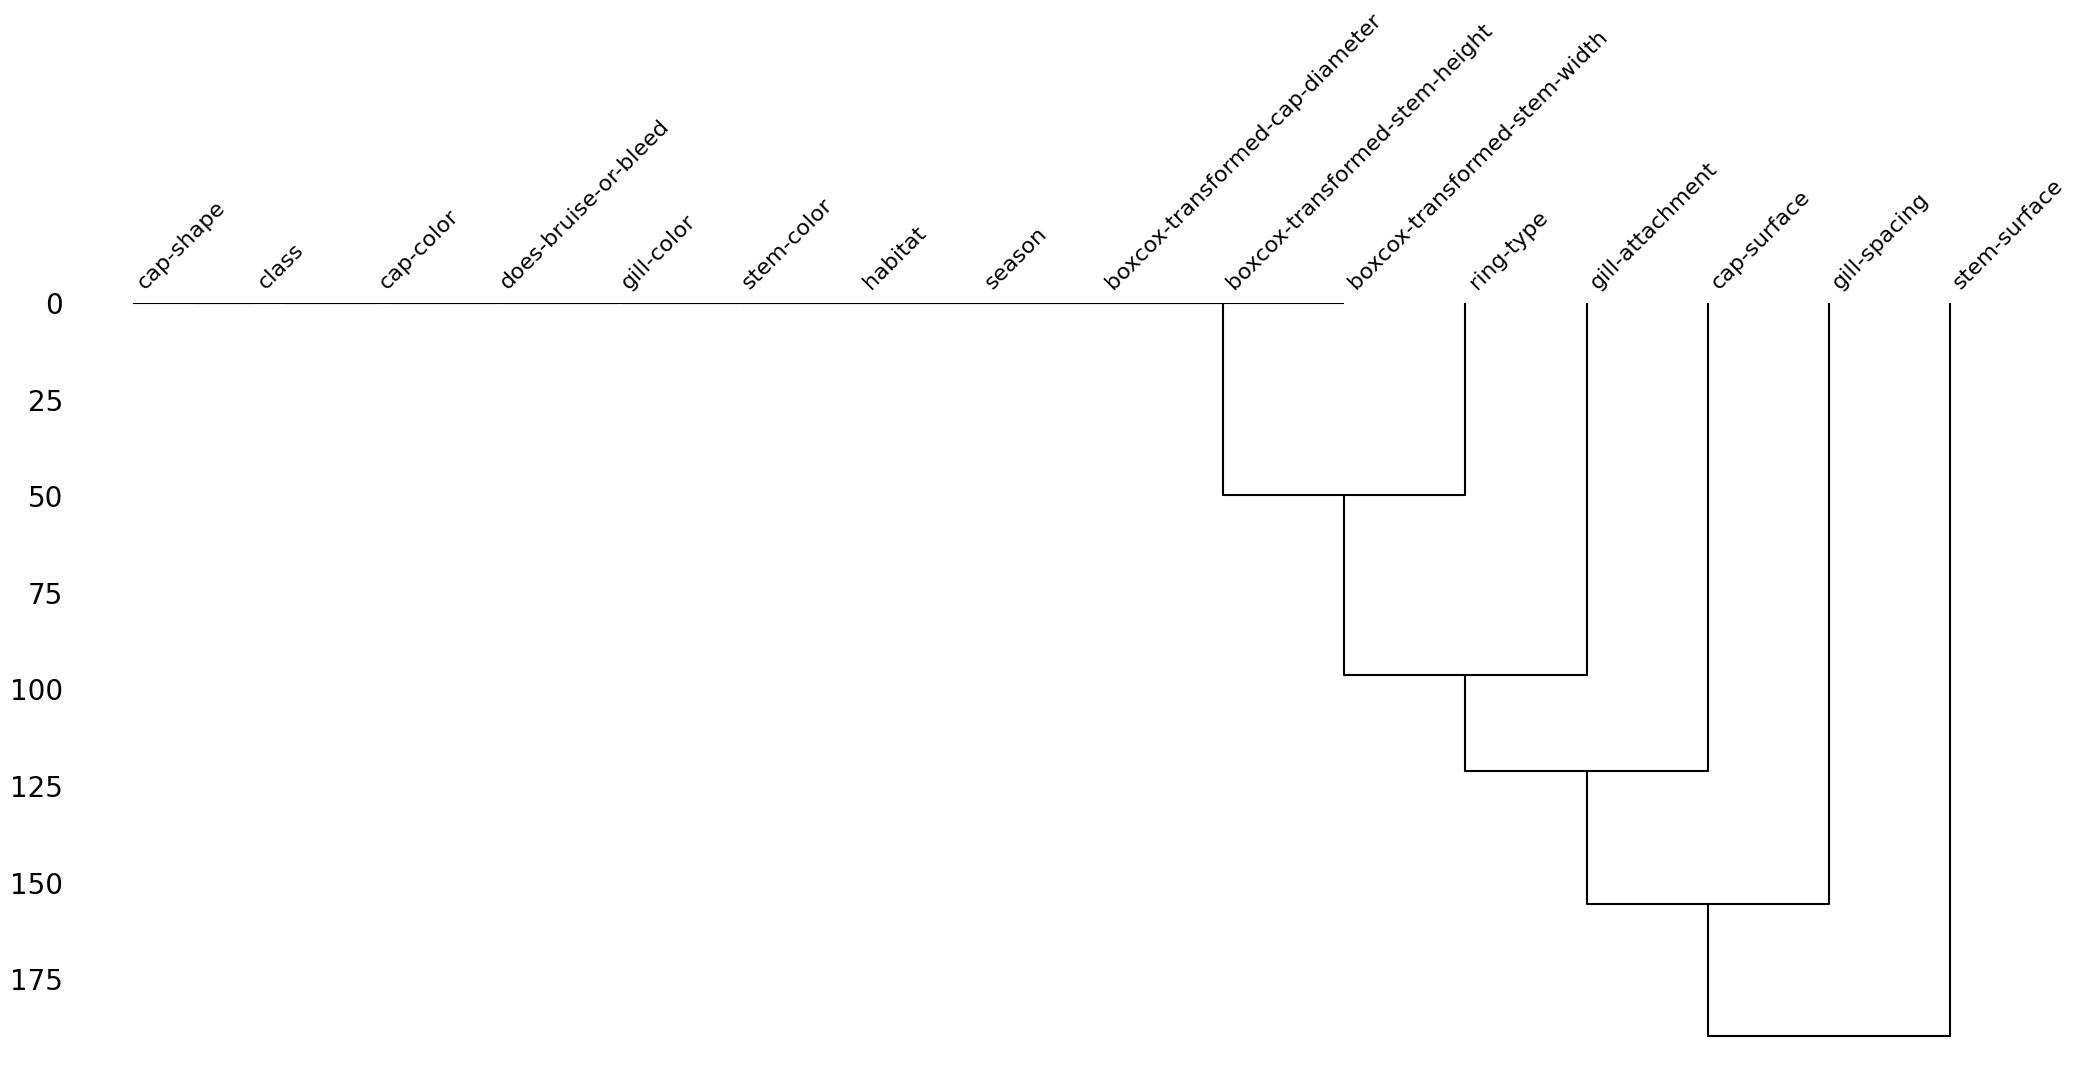

In [66]:
# Visualize a dendrogram of missing values in the dataframe;
msno.dendrogram(df)

<Axes: >

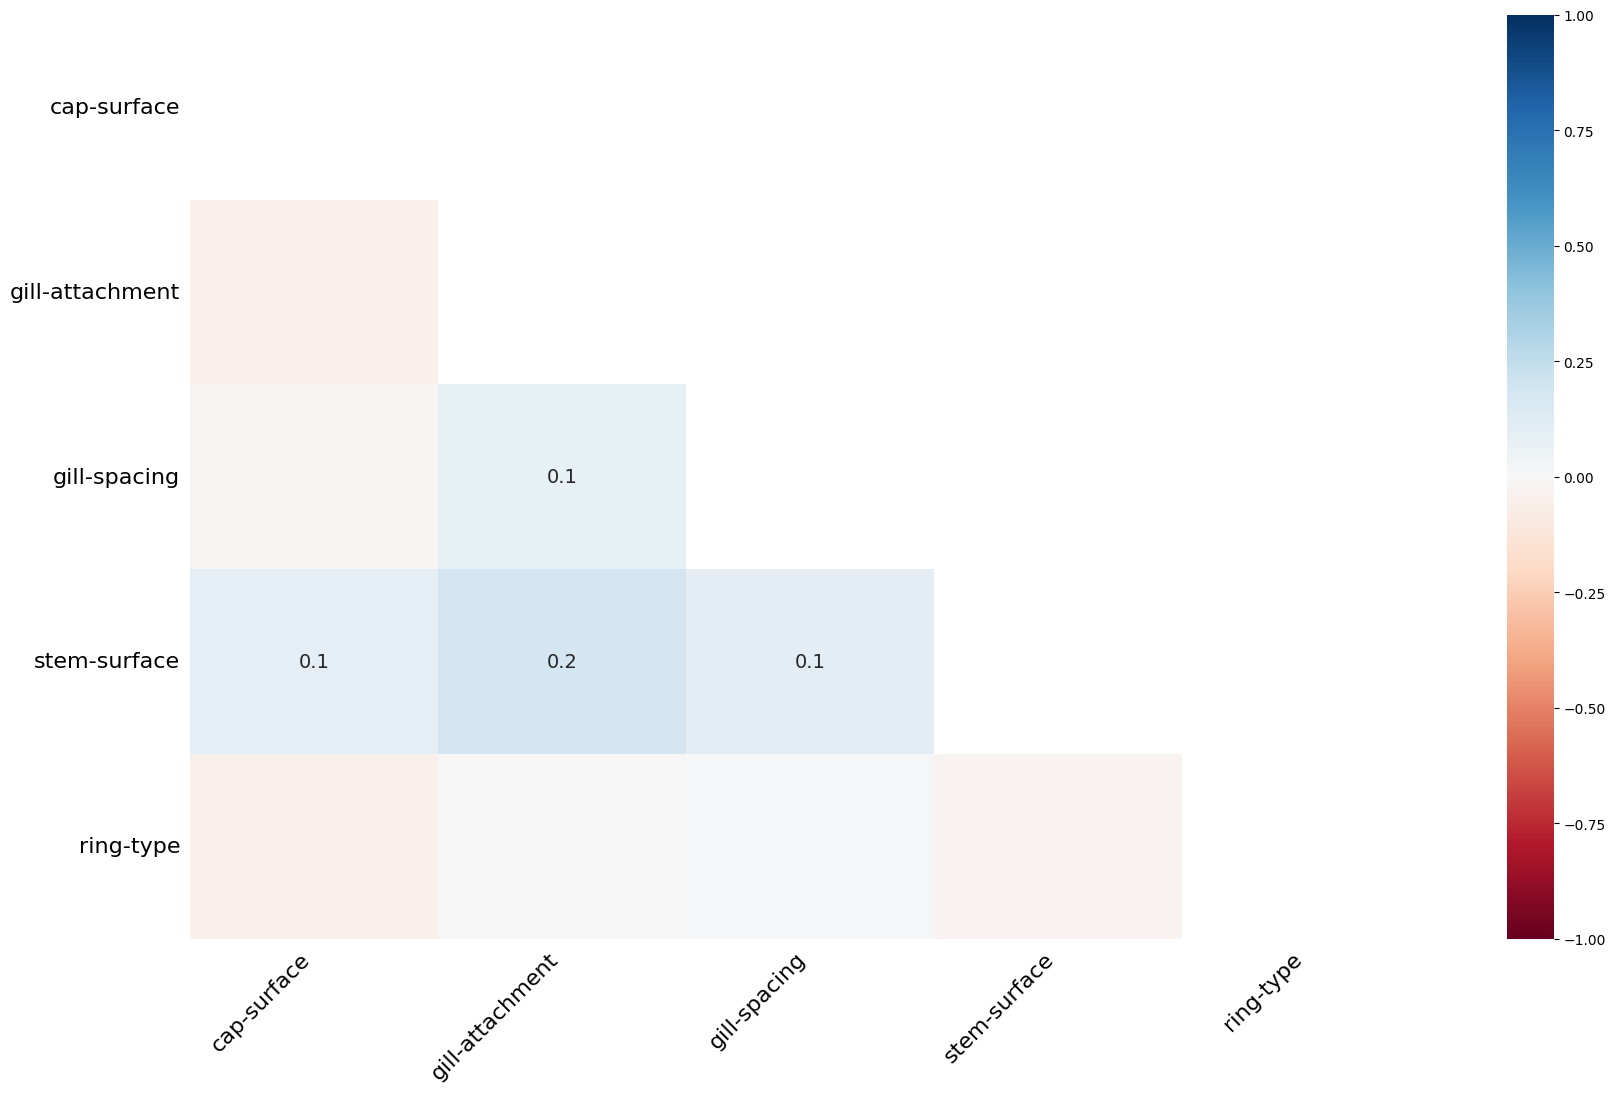

In [67]:
# Call the heatmap function from the msno module, pass in the df parameter
msno.heatmap(df)

### The above diagrams showing there is no relation between the categorical columns

In [68]:
# Calculate the percentage of missing values in the dataframe
df.isna().sum()*100/df.shape[0]

class                               0.000000
cap-shape                           0.000000
cap-surface                        24.075432
cap-color                           0.000000
does-bruise-or-bleed                0.000000
gill-attachment                    15.597879
gill-spacing                       40.798650
gill-color                          0.000000
stem-surface                       64.103395
stem-color                          0.000000
ring-type                           4.213201
habitat                             0.000000
season                              0.000000
boxcox-transformed-cap-diameter     0.000000
boxcox-transformed-stem-height      0.000000
boxcox-transformed-stem-width       0.000000
dtype: float64

C:\Users\panda\AppData\Local\Temp\ipykernel_42864\3747995230.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix Heatmap')

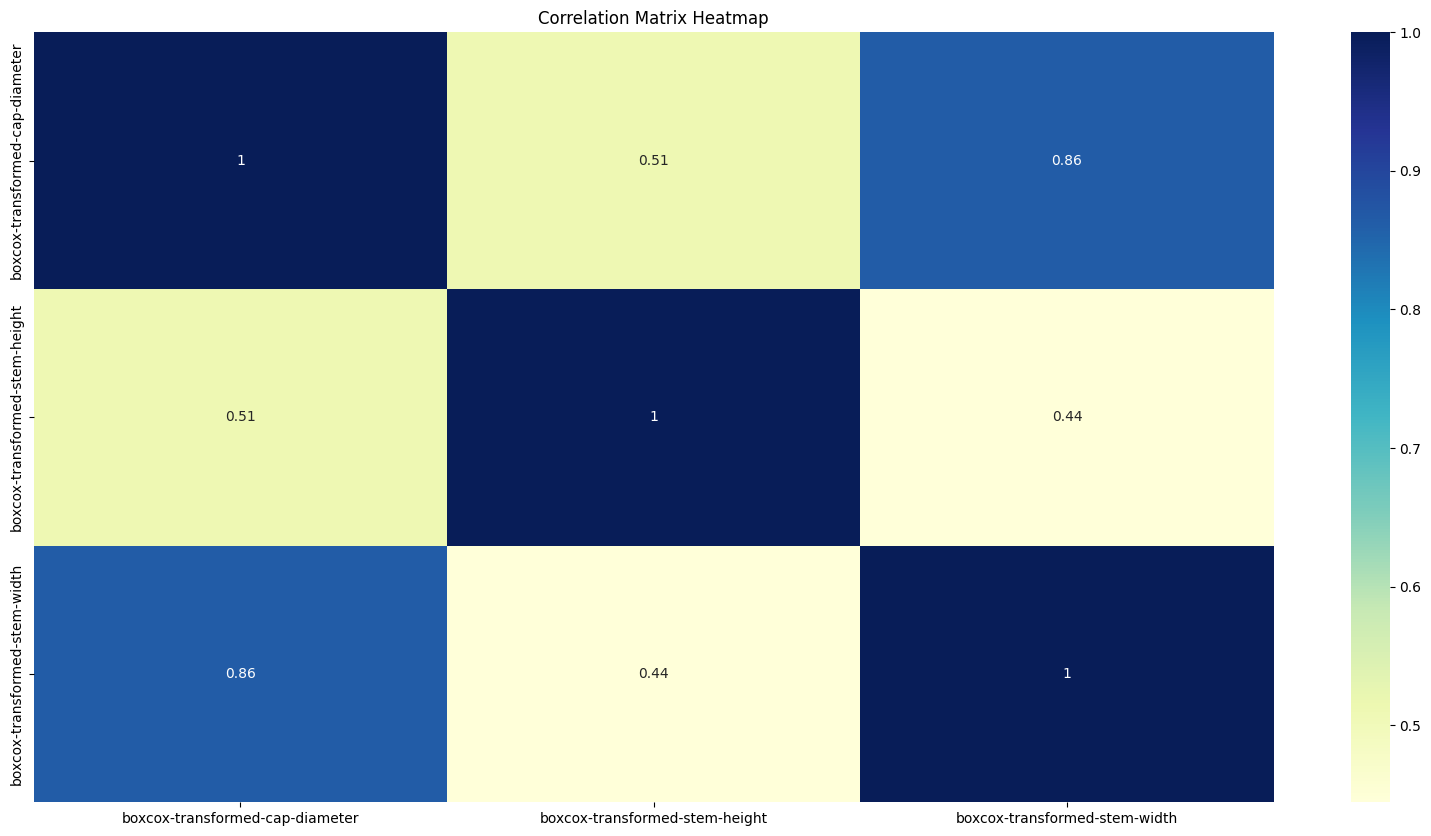

In [69]:
# Generate a heatmap of the correlation matrix for the DataFrame
plt.figure(figsize=(20, 10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix Heatmap')

In [70]:
# using cramar's corelation and chi-square test to test the association and strength betweeon the columns
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage:
column1 = df['gill-spacing']
column2 = df['class']
correlation = cramers_v(column1, column2)

print(f"Cramér's V: {correlation}")


# Assuming 'df' is your DataFrame with categorical variables encoded
# and 'column1' and 'column2' are the columns you want to test
observed_data = pd.crosstab(df['gill-spacing'], df['class'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(observed_data)

# Display the results
# print("Chi-square statistic:", chi2)
print("P-value from chi-square test:", p)
# print("Degrees of freedom:", dof)
# print("Expected frequencies table:")
print(expected)


Cramér's V: 0.1469522650755306
P-value from chi-square test: 5.670507501524689e-164
[[11129.45237752 13002.54762248]
 [ 3581.14527231  4183.85472769]
 [ 1302.40235016  1521.59764984]]


From the above result:
This suggests that there is statistical evidence showing that there is some relationship between the two categorical variables, but the relationship is very weak

In [71]:
#using cramar's corelation and chi-square test to test the association and strength betweeon the columns
import pandas as pd
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage:
column1 = df['stem-surface']
column2 = df['class']
correlation = cramers_v(column1, column2)

print(f"Cramér's V: {correlation}")

# Assuming 'df' is your DataFrame with categorical variables encoded
# and 'column1' and 'column2' are the columns you want to test
observed_data = pd.crosstab(df['stem-surface'], df['class'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(observed_data)

# Display the results
# print("Chi-square statistic:", chi2)
print("P-value from chi-square test:", p)
# print("Degrees of freedom:", dof)
# print("Expected frequencies table:")
print(expected)

Cramér's V: 0.36259822274988207
P-value from chi-square test: 0.0
[[ 653.63843633 1099.36156367]
 [ 199.48463402  335.51536598]
 [1639.12981523 2756.87018477]
 [ 461.23830333  775.76169667]
 [2162.63715385 3637.36284615]
 [ 985.86424738 1658.13575262]
 [1748.00740987 2939.99259013]]


From the above result:
This suggests that there is statistical evidence showing that there is some relationship between the two categorical variables, but the relationship is moderate

In [72]:
# Drop the column 'gill-spacing' from the dataframe
df.drop(['gill-spacing'],inplace = True,axis = 1)

In [73]:
# Remove the 'stem-surface' column from the DataFrame
df.drop(['stem-surface'],inplace = True,axis = 1)

In [74]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color',
       'ring-type', 'habitat', 'season', 'boxcox-transformed-cap-diameter',
       'boxcox-transformed-stem-height', 'boxcox-transformed-stem-width'],
      dtype='object')

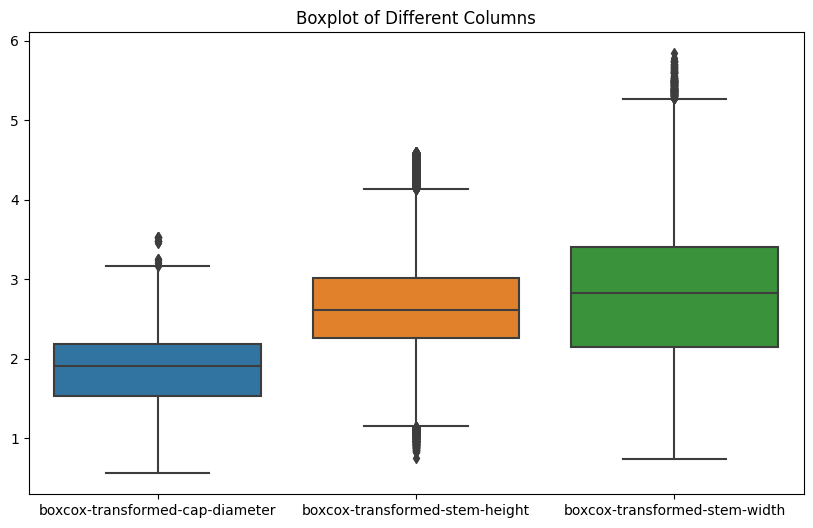

In [75]:
# Plot boxplots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Different Columns')
plt.show()

In [76]:
df.isna().sum()*100/df.shape[0]

class                               0.000000
cap-shape                           0.000000
cap-surface                        24.075432
cap-color                           0.000000
does-bruise-or-bleed                0.000000
gill-attachment                    15.597879
gill-color                          0.000000
stem-color                          0.000000
ring-type                           4.213201
habitat                             0.000000
season                              0.000000
boxcox-transformed-cap-diameter     0.000000
boxcox-transformed-stem-height      0.000000
boxcox-transformed-stem-width       0.000000
dtype: float64

In [77]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace missing values using backward fill for the entire DataFrame
df= df.fillna(method='bfill')

# Display the DataFrame with missing values filled using backward fill
df.isna().sum()*100/df.shape[0]

class                              0.0
cap-shape                          0.0
cap-surface                        0.0
cap-color                          0.0
does-bruise-or-bleed               0.0
gill-attachment                    0.0
gill-color                         0.0
stem-color                         0.0
ring-type                          0.0
habitat                            0.0
season                             0.0
boxcox-transformed-cap-diameter    0.0
boxcox-transformed-stem-height     0.0
boxcox-transformed-stem-width      0.0
dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['class'],axis = 1),df['class'],test_size= .3,random_state=42)

In [79]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Assuming X_train is your training feature matrix with categorical features

# Identify categorical columns in your data
categorical_columns = [...]  # List of column names or indices containing categorical features

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
scalar = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('trf1', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), ['cap-shape','cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color',  'ring-type', 'habitat', 'season']),
        ('trf2', scalar, ['boxcox-transformed-cap-diameter', 'boxcox-transformed-stem-height', 'boxcox-transformed-stem-width'])
    ],
    remainder='passthrough'
) 

# Create a pipeline with the preprocessor and RandomForestClassifier
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth= 11, random_state=1, min_samples_leaf= 8))
])

# Fit the pipeline on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(classification_report(y_test,y_pred))



C:\Users\panda\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[[7547  234]
 [  76 9738]]
              precision    recall  f1-score   support

           e       0.99      0.97      0.98      7781
           p       0.98      0.99      0.98      9814

    accuracy                           0.98     17595
   macro avg       0.98      0.98      0.98     17595
weighted avg       0.98      0.98      0.98     17595



In [80]:
# Fit and transform X_train using the preprocessor
X_train = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train)

C:\Users\panda\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



0    1    2    3    4    5    6    7    8    9   ...   66   67   68  \
0      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
41049  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41050  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
41051  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
41052  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41053  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        69   70   71   72        73        74        75  
0      0.0  0.0  1.0  0.0 -0.721786 -0.717987 -0.566242  
1      0.0  0.0  1.0  0.0  1.662364 -0.217157  1.716593  
2      0.0  0.0  1.0  0.0 -0.535112  0.666702 -1.011499  
3      0.0  0.0  0.0  0.0 -1.493808 -0.035604 -0.936093  
4      0.0  0.0  1.0  0.0  0.171853 -0.089648  0.058482  
...    ...  ...  ...  ...       ...       ...       ...  
41049  0.0  0.0  0.0  0.0 -0.457322  0.146209  2.207789  
41050  0.0  0.0  0.0  0.0  0.512108  0.406874  0.998669  
41051  0.0  0.0  0.0  0.0  1.054249  1.777923  0.830530  
41052  0.0  0.0  1.0  0.0 -0.089383 -0.873045 -0.317286  
41053  0.0  0.0  0.0  1.0  2.064111 -0.157156  2.192797  

[41054 rows x 76 columns]

In [81]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.72178613,
        -0.71798674, -0.56624192],
       [ 0.        ,  1.        ,  0.        , ...,  1.66236402,
        -0.21715655,  1.71659312],
       [ 0.        ,  0.        ,  0.        , ..., -0.53511238,
         0.66670208, -1.01149886],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.05424926,
         1.77792252,  0.83053043],
       [ 0.        ,  0.        ,  0.        , ..., -0.08938259,
        -0.87304549, -0.3172855 ],
       [ 0.        ,  1.        ,  0.        , ...,  2.06411148,
        -0.15715605,  2.19279728]])

In [82]:
# Transform the X_test using the preprocessor
X_test = preprocessor.transform(X_test)
pd.DataFrame(X_test)

0    1    2    3    4    5    6    7    8    9   ...   66   67   68  \
0      0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
17590  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17591  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17592  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17593  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
17594  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        69   70   71   72        73        74        75  
0      0.0  0.0  0.0  1.0  1.108109  0.797889  1.101587  
1      0.0  0.0  0.0  1.0  0.978762 -1.884696  0.472375  
2      0.0  0.0  0.0  0.0  0.801237  1.378413  1.192975  
3      0.0  0.0  0.0  0.0 -1.657011 -0.554818 -1.780414  
4      0.0  0.0  1.0  0.0 -0.140792  0.354494 -0.262197  
...    ...  ...  ...  ...       ...       ...       ...  
17590  0.0  0.0  0.0  1.0  1.172524 -1.891483  0.534906  
17591  0.0  0.0  0.0  0.0  0.891266  1.884335  0.182263  
17592  0.0  0.0  1.0  0.0  0.492577 -0.787233  0.259594  
17593  0.0  0.0  0.0  1.0  1.575129  2.836128  0.681083  
17594  0.0  0.0  0.0  0.0  0.277697  0.232304  0.323783  

[17595 rows x 76 columns]

In [83]:
# Create dummy variables (one-hot encoding)
y_train= pd.get_dummies(y_train, drop_first=True)
y_test= pd.get_dummies(y_test, drop_first=True)
# Print the result
y_test

p
5207   0
55635  0
38603  1
11400  0
20080  1
...   ..
55664  0
35423  1
30798  1
3      1
26621  1

[17595 rows x 1 columns]

In [84]:
# Assuming 'y_train' and 'y_test' are your Pandas Series
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_test

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [85]:
from sklearn.decomposition import PCA
# Step 2: Apply PCA to both the training and testing data
pca = PCA(n_components=.95)

# Fit and transform on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the testing data using the same transformation parameters
X_test_pca = pca.transform(X_test)
pd.DataFrame(X_train_pca)

0         1         2         3         4         5         6   \
0     -1.149145  0.430989  0.667277  0.870618 -0.796652  1.218645  0.185998   
1      1.882950  1.445813  0.781051  0.960405 -0.181265  0.303201  0.315012   
2     -0.713909 -0.977007  0.193540 -0.113447  0.098127  0.000934  0.763820   
3     -1.429501 -0.602796 -0.465603 -0.612459  0.264908 -0.363451 -0.302140   
4      0.156686 -0.257473  0.496685 -0.045984 -1.133600 -0.412799  0.647735   
...         ...       ...       ...       ...       ...       ...       ...   
41049  1.054396  0.826267  0.969462  0.666257  0.304024 -0.395915  0.668334   
41050  1.129632 -0.025914  0.537980 -0.206387  0.005344 -0.004614 -0.254675   
41051  2.257686 -1.195531 -0.768455  0.701157 -0.385875 -0.078401 -0.370306   
41052 -0.597701  0.538707 -0.356795 -0.804347 -0.142014  0.072213  0.078356   
41053  2.517848  1.784116  0.783064  0.463121  0.660066 -0.491301 -0.247960   

             7         8         9   ...        34        35        36  \
0     -0.328584  0.338713  0.108091  ...  0.070663 -0.108965 -0.225076   
1      0.494852 -0.690192  0.133886  ...  0.241141  0.161361  0.014371   
2     -0.420665  0.193330  0.327211  ...  0.032372 -0.148934 -0.281415   
3     -0.268578  0.191510 -0.544138  ... -0.154153  0.033035  0.014908   
4      0.047791 -0.394323  0.295529  ...  0.046450  0.074951 -0.076921   
...         ...       ...       ...  ...       ...       ...       ...   
41049 -0.061020  1.634847 -0.401851  ... -0.017346 -0.335112 -0.317989   
41050 -0.366222  0.203958 -0.941789  ...  0.288634  0.184546 -0.546613   
41051  0.259839 -0.244886  0.246928  ... -0.073165 -0.045931 -0.104130   
41052  0.621708 -0.467386 -0.242568  ... -0.113875 -0.042450  0.163529   
41053  0.265889 -0.811892  0.101987  ... -0.156138  0.053015 -0.108512   

             37        38        39        40        41        42        43  
0     -0.117120 -0.039226  0.102096  0.028283 -0.078990 -0.000660  0.020929  
1      0.103694  0.091267  0.021733  0.147101  0.021366 -0.099045 -0.064401  
2     -0.094968  0.039084 -0.167098  0.059274 -0.041337 -0.158864  0.096345  
3      0.039845  0.189962 -0.220445 -0.264986 -0.054495 -0.197036  0.109805  
4      0.065137  0.239020  0.302132  0.167763  0.022040 -0.095468 -0.029799  
...         ...       ...       ...       ...       ...       ...       ...  
41049 -0.239236  0.101760  0.168590 -0.333280  0.067927  0.135632 -0.216787  
41050 -0.140639  0.104644 -0.197223 -0.258831 -0.260003 -0.089609  0.003262  
41051 -0.074882  0.133730  0.176069  0.183293  0.041826 -0.041082  0.031545  
41052 -0.350121  0.028283 -0.107374  0.006354  0.137443 -0.028866 -0.104902  
41053  0.004963 -0.170557  0.035141  0.143630 -0.086794  0.169645 -0.213686  

[41054 rows x 44 columns]

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_np(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = np.arange(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for training set
vif_train = calculate_vif_np(X_train_pca)
print("VIF for Training Set:")
print(vif_train)

# Calculate VIF for testing set
vif_test = calculate_vif_np(X_test_pca)
print("\nVIF for Testing Set:")
print(vif_train)

VIF for Training Set:
    Variable  VIF
0          0  1.0
1          1  1.0
2          2  1.0
3          3  1.0
4          4  1.0
5          5  1.0
6          6  1.0
7          7  1.0
8          8  1.0
9          9  1.0
10        10  1.0
11        11  1.0
12        12  1.0
13        13  1.0
14        14  1.0
15        15  1.0
16        16  1.0
17        17  1.0
18        18  1.0
19        19  1.0
20        20  1.0
21        21  1.0
22        22  1.0
23        23  1.0
24        24  1.0
25        25  1.0
26        26  1.0
27        27  1.0
28        28  1.0
29        29  1.0
30        30  1.0
31        31  1.0
32        32  1.0
33        33  1.0
34        34  1.0
35        35  1.0
36        36  1.0
37        37  1.0
38        38  1.0
39        39  1.0
40        40  1.0
41        41  1.0
42        42  1.0
43        43  1.0

VIF for Testing Set:
    Variable  VIF
0          0  1.0
1          1  1.0
2          2  1.0
3          3  1.0
4          4  1.0
5          5  1.0
6          6  1.0
7 

### Applying Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with balanced class weights
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_pca, y_train)
y_pred_lr=log_reg.predict(X_test_pca)


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67      7781
           1       0.74      0.78      0.76      9814

    accuracy                           0.72     17595
   macro avg       0.72      0.71      0.72     17595
weighted avg       0.72      0.72      0.72     17595



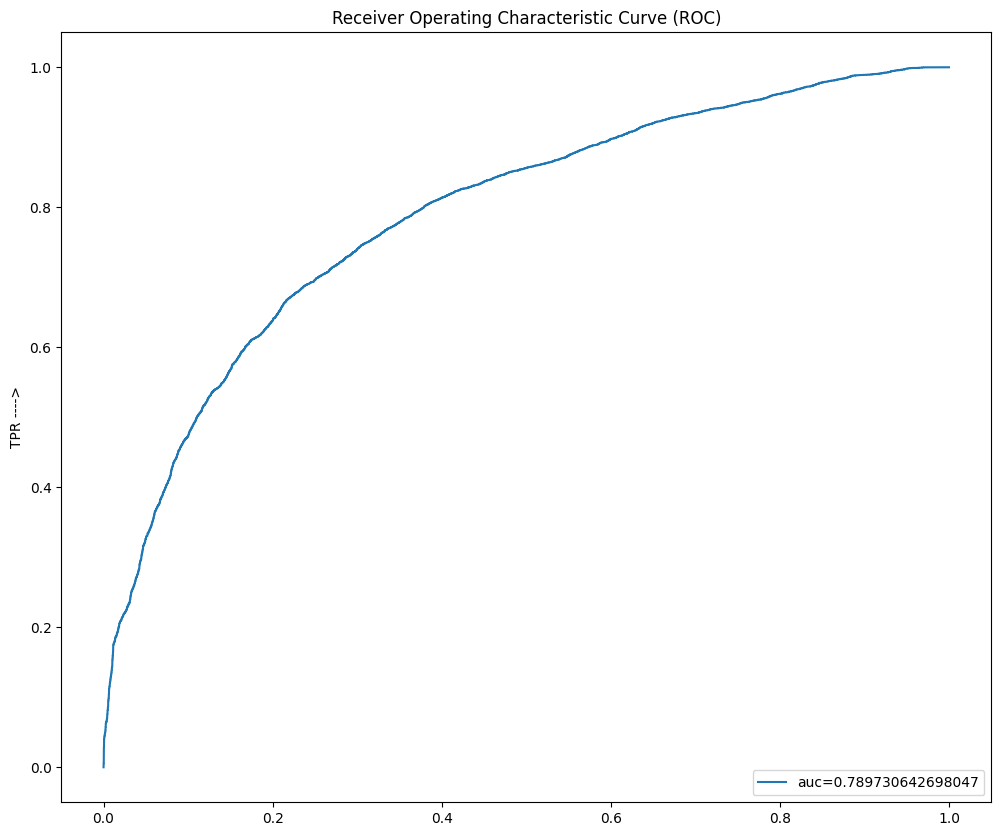

In [89]:
from sklearn import metrics

# Predict probabilities of positive class
y_pred_proba = log_reg.predict_proba(X_test_pca)[::,1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Calculate area under the ROC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Create a figure and plot the ROC curve
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.ylabel("TPR ---->")
plt.show()

In [90]:
# Predict probabilities for the positive class
y_scores = log_reg.predict_proba(X_test_pca)[:, 1]

# Print the predicted probabilities
y_scores

array([0.56073307, 0.0927477 , 0.81241799, ..., 0.4761988 , 0.38138037,
       0.95865904])

In [91]:
from sklearn.metrics import roc_curve

# Calculate false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

thresholds

array([       inf, 0.98984128, 0.97370408, ..., 0.07738098, 0.077049  ,
       0.01655011])

In [92]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 100
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# # Define figure and add data
fig = go.Figure(data=data, layout=layout)
 
# # Show figure
fig.show()

In [93]:
import numpy as np

# Perform calculations to find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.5989514510668053


In [94]:
from sklearn.metrics import recall_score, accuracy_score
import pandas as pd

# Assuming you have defined thresholds and y_scores earlier

recall_lg = []
accuracy_lg = []

for thres in thresholds:
    # Using y_scores and applying threshold for binary classification
    y_pred_log_reg = np.where(y_scores > thres, 1, 0)
    
    # Calculate recall and accuracy using the correct predicted values
    recall_lg.append(recall_score(y_test, y_pred_log_reg))
    accuracy_lg.append(accuracy_score(y_test, y_pred_log_reg))

# Create a DataFrame to store the results
recall_df = pd.DataFrame({'Thresholds': thresholds, 'Recall': recall_lg, 'Accuracy': accuracy_lg})

# Filter the results based on a minimum accuracy threshold
filtered_results = recall_df[recall_df['Accuracy'] >= 0.70].sort_values(by='Accuracy', ascending=False)

# Display the filtered results
print(filtered_results)

      Thresholds    Recall  Accuracy
3228    0.535724  0.745364  0.723274
3227    0.535776  0.745262  0.723274
3237    0.535141  0.745975  0.723217
3235    0.535194  0.745873  0.723217
3232    0.535459  0.745669  0.723217
...          ...       ...       ...
1950    0.649817  0.591502  0.700483
4479    0.398670  0.854290  0.700369
4480    0.398620  0.854290  0.700313
1949    0.650100  0.590585  0.700028
1948    0.650199  0.590483  0.700028

[2533 rows x 3 columns]


### Applying Support Vector Machine(SVM)

In [95]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf')
svc.fit(X_train_pca,y_train)
y_pred_svc2 = svc.predict(X_test_pca)

In [96]:
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test,y_pred_svc2)
print(conf_matrix)
print(classification_report(y_test,y_pred_svc2))

[[7772    9]
 [  10 9804]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7781
           1       1.00      1.00      1.00      9814

    accuracy                           1.00     17595
   macro avg       1.00      1.00      1.00     17595
weighted avg       1.00      1.00      1.00     17595



In [97]:

from sklearn.model_selection import cross_val_score
import numpy as np

# Assume X and y are your feature matrix and target variable
# Replace this with your actual data
X = ...  # Your feature matrix
y = ...  # Your target variable

# Create a SVM classifier
# Perform 5-fold cross-validation (adjust cv parameter as needed)
cv_scores = cross_val_score(svc, X_train_pca, y_train, cv=5,scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores of SVM:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.2f}".format(np.std(cv_scores)))

Cross-Validation Scores of SVM: [0.99866033 0.99841676 0.99878212 0.99914749 0.99853837]
Mean Accuracy: 1.00
Standard Deviation: 0.00


### Applying Naive Bayes Classifier

In [98]:
# Create a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_pca,y_train)
y_predict_nb = clf.predict(X_test_pca)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_nb))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      7781
           1       0.72      0.69      0.71      9814

    accuracy                           0.68     17595
   macro avg       0.68      0.68      0.68     17595
weighted avg       0.68      0.68      0.68     17595



In [100]:
### Applying KNN classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier as knn
neigh = knn(n_neighbors=10)
neigh.fit(X_train_pca,y_train)
y_predict_knn = neigh.predict(X_test_pca)

In [102]:
conf_matrix = confusion_matrix(y_test,y_predict_knn)
conf_matrix

array([[7770,   11],
       [  14, 9800]], dtype=int64)

In [103]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7781
           1       1.00      1.00      1.00      9814

    accuracy                           1.00     17595
   macro avg       1.00      1.00      1.00     17595
weighted avg       1.00      1.00      1.00     17595



In [104]:

from sklearn.model_selection import cross_val_score
import numpy as np

# Assume X and y are your feature matrix and target variable
# Replace this with your actual data
X = ...  # Your feature matrix
y = ...  # Your target variable

# Create a KNN classifier
knn = knn(n_neighbors=10)  # You can adjust the number of neighbors (k)

# Perform 5-fold cross-validation (adjust cv parameter as needed)
cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores in KNN:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.2f}".format(np.std(cv_scores)))

Cross-Validation Scores in KNN: [0.99841676 0.99805139 0.99878212 0.99841676 0.99829476]
Mean Accuracy: 1.00
Standard Deviation: 0.00


In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test_pca)

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(classification_report(y_test,y_pred))


[[7777    4]
 [   4 9810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7781
           1       1.00      1.00      1.00      9814

    accuracy                           1.00     17595
   macro avg       1.00      1.00      1.00     17595
weighted avg       1.00      1.00      1.00     17595



In [106]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# Assuming 'model', 'model2', 'model3', 'model4' are your ML models
models = [log_reg, svc, clf,rfc,neigh]

# List to store results
results = []

# Train each model and evaluate on the test data
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    results.append({'Algorithm': str(model), 'Recall': recall, 'Accuracy': accuracy, 'Precision': precision})

# Convert results to a table using tabulate
table = tabulate(results, headers='keys', tablefmt='pretty')

# Print the table
print(table)


+--------------------------------------+--------------------+--------------------+--------------------+
|              Algorithm               |       Recall       |      Accuracy      |     Precision      |
+--------------------------------------+--------------------+--------------------+--------------------+
|         LogisticRegression()         | 0.7800081516201345 | 0.7217391304347827 | 0.7366243264049269 |
|                SVC()                 | 0.9989810474831873 | 0.9989201477692526 | 0.9990828492815653 |
|             GaussianNB()             | 0.6906460158956592 | 0.6798522307473714 | 0.7229866666666667 |
|       RandomForestClassifier()       | 0.9996943142449561 | 0.9994884910485934 | 0.9993888153203626 |
| KNeighborsClassifier(n_neighbors=10) | 0.9985734664764622 | 0.9985791418016482 | 0.9988788094995413 |
+--------------------------------------+--------------------+--------------------+--------------------+


In [107]:
# Random forests allow you to determine the feature importance. SVM’s can’t do this. 
# Random forests are much quicker and simpler to build than an SVM. 
# For multi-class classification problems, SVMs require a one-vs-rest method, which is 
# less scalable and more memory intensive.

In [108]:
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score
# SVM
svc= SVC(kernel='rbf',probability=True)
svc.fit(X_train_pca, y_train)
svc_scores = svc.predict_proba(X_test_pca)[:,1]

# KNN model
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_pca, y_train)
knn_scores = neigh.predict_proba(X_test_pca)[:,1]
# RFC model
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)
rfc_scores = rfc.predict_proba(X_test_pca)[:,1]


# Generate ROC curve data for SVM
svc_fpr,svc_tpr, svc_thresholds = roc_curve(y_test, svc_scores)
svc_auc = roc_auc_score(y_test,svc_scores)

# Generate ROC curve data for KNN model
knn_fpr,knn_tpr, knn_thresholds = roc_curve(y_test, knn_scores)
knn_auc = roc_auc_score(y_test,knn_scores)\

# Generate ROC curve data for RFC model
rfc_fpr,rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_scores)
rfc_auc = roc_auc_score(y_test,rfc_scores)

# Generate a trace for the SVM ROC curve
trace0 = go.Scatter(
    x=svc_fpr,
    y=svc_tpr,
    mode='lines',
    name=f'SVM (Area = {svc_auc:.2f})'
)

# Generate a trace for the KNN ROC curve
trace1 = go.Scatter(
    x=knn_fpr,
    y=knn_tpr,
    mode='lines',
    name=f'KNN (Area = {knn_auc:.2f})'
)

# Generate a trace for the RFC ROC curve
trace2 = go.Scatter(
    x=rfc_fpr,
    y=rfc_tpr,
    mode='lines',
    name=f'RFC (Area = {rfc_auc:.2f})'
)


# Diagonal line
trace3 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2,trace3]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()